In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix

In [170]:
df=pd.read_csv('income.csv')
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [171]:
df.shape

(31978, 13)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [173]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [174]:
df.duplicated().sum()

3462

In [175]:
df=df.drop_duplicates()

In [176]:
df.shape

(28516, 13)

In [177]:
df['SalStat'].value_counts()

 less than or equal to 50,000    21451
 greater than 50,000              7065
Name: SalStat, dtype: int64

In [178]:
le=LabelEncoder()

In [179]:
df['SalStat']=le.fit_transform(df['SalStat'])

In [180]:
df['SalStat'].value_counts()

1    21451
0     7065
Name: SalStat, dtype: int64

In [181]:
# SalStat = less than or equal to 50,000 : 0 , greater than 50,000 : 1
df.corr()['SalStat'].sort_values(ascending=False)

C:\Users\power\AppData\Local\Temp\ipykernel_4492\899931080.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalStat'].sort_values(ascending=False)


SalStat         1.000000
capitalloss    -0.152092
age            -0.214459
hoursperweek   -0.227094
capitalgain    -0.230167
Name: SalStat, dtype: float64

C:\Users\power\AppData\Local\Temp\ipykernel_4492\3163282795.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


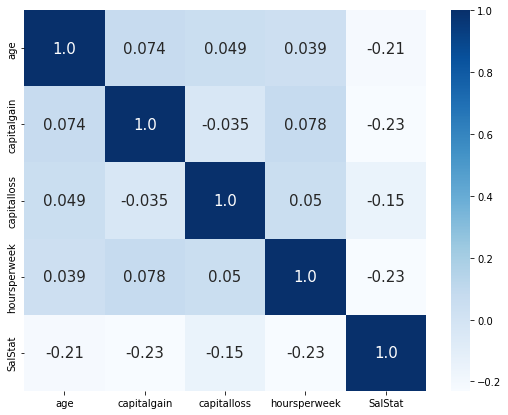

In [182]:
# SalStat = less than or equal to 50,000 : 0 , greater than 50,000 : 1
corr_matrix=df.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix,annot=True,fmt='.2',annot_kws={'size':15},cmap='Blues')
plt.show()

In [183]:
# SalStat = less than or equal to 50,000 : 0 , greater than 50,000 : 1
df.groupby(['SalStat']).mean()

C:\Users\power\AppData\Local\Temp\ipykernel_4492\1809486862.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['SalStat']).mean()


,age,capitalgain,capitalloss,hoursperweek
SalStat,,,,
0,44.384996,4270.797452,208.824912,45.661005
1,37.573446,168.983684,59.815953,38.959070


In [184]:
df['age'].unique()

array([45, 24, 44, 27, 20, 51, 17, 19, 60, 40, 30, 38, 23, 32, 54, 50, 37,
       52, 49, 22, 35, 67, 46, 33, 43, 28, 41, 25, 63, 59, 34, 26, 72, 62,
       58, 47, 39, 53, 57, 21, 42, 74, 36, 29, 31, 69, 18, 65, 55, 48, 71,
       70, 66, 56, 61, 68, 64, 73, 81, 78, 76, 90, 88, 75, 77, 80, 82, 79,
       83, 84, 85, 86, 87], dtype=int64)

In [185]:
df['JobType'].unique()

array([' Private', ' Federal-gov', ' ?', ' Self-emp-inc',
       ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [186]:
df[df['JobType']==' ?']

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,?,11th,Never-married,?,Own-child,White,Female,0,0,5,United-States,1
17,32,?,Some-college,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,1
29,22,?,Some-college,Never-married,?,Own-child,White,Male,0,0,40,United-States,1
42,52,?,12th,Never-married,?,Other-relative,Black,Male,594,0,40,United-States,1
44,63,?,1st-4th,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31884,67,?,11th,Married-civ-spouse,?,Husband,White,Male,0,0,8,United-States,1
31885,30,?,Assoc-voc,Divorced,?,Unmarried,White,Female,0,0,40,United-States,1
31934,20,?,HS-grad,Never-married,?,Other-relative,White,Female,0,0,35,United-States,1
31945,28,?,Some-college,Married-civ-spouse,?,Wife,White,Female,0,1887,40,United-States,0


In [187]:
df['JobType'].value_counts()

 Private             19214
 Self-emp-not-inc     2431
 Local-gov            2014
 ?                    1605
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [188]:
df=df[df['JobType']!=' ?']

In [189]:
df=df[df['JobType']!=' Without-pay']

In [190]:
df=df[df['JobType']!=' Never-worked']

In [191]:
df['JobType'].unique()

array([' Private', ' Federal-gov', ' Self-emp-inc', ' Self-emp-not-inc',
       ' Local-gov', ' State-gov'], dtype=object)

In [192]:
df['JobType'].value_counts()

 Private             19214
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
Name: JobType, dtype: int64

In [193]:
df['EdType'].value_counts()

 HS-grad         8259
 Some-college    5891
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       993
 11th             941
 10th             770
 7th-8th          540
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: EdType, dtype: int64

In [194]:
df=df[df['EdType']!=' Preschool']

In [195]:
df['EdType'].unique()

array([' HS-grad', ' Some-college', ' 9th', ' Assoc-voc', ' Assoc-acdm',
       ' Bachelors', ' 1st-4th', ' Masters', ' 10th', ' 5th-6th', ' 11th',
       ' Prof-school', ' 12th', ' Doctorate', ' 7th-8th'], dtype=object)

In [196]:
df['EdType'].value_counts()

 HS-grad         8259
 Some-college    5891
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       993
 11th             941
 10th             770
 7th-8th          540
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
Name: EdType, dtype: int64

In [197]:
df['maritalstatus'].value_counts()

 Married-civ-spouse       12347
 Never-married             8363
 Divorced                  4008
 Separated                  927
 Widowed                    814
 Married-spouse-absent      366
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [198]:
df=df[df['maritalstatus']!=' Married-AF-spouse']

In [199]:
df['maritalstatus'].unique()

array([' Divorced', ' Never-married', ' Married-civ-spouse', ' Widowed',
       ' Married-spouse-absent', ' Separated'], dtype=object)

In [200]:
df['maritalstatus'].value_counts()

 Married-civ-spouse       12347
 Never-married             8363
 Divorced                  4008
 Separated                  927
 Widowed                    814
 Married-spouse-absent      366
Name: maritalstatus, dtype: int64

In [201]:
df['occupation'].value_counts()

 Prof-specialty       3779
 Exec-managerial      3645
 Adm-clerical         3281
 Craft-repair         3221
 Sales                3203
 Other-service        2895
 Machine-op-inspct    1654
 Transport-moving     1418
 Handlers-cleaners    1156
 Farming-fishing       942
 Tech-support          858
 Protective-serv       625
 Priv-house-serv       139
 Armed-Forces            9
Name: occupation, dtype: int64

In [202]:
df=df[df['occupation']!=' Armed-Forces']

In [203]:
df['occupation'].unique()

array([' Adm-clerical', ' Prof-specialty', ' Craft-repair', ' Sales',
       ' Exec-managerial', ' Machine-op-inspct', ' Transport-moving',
       ' Farming-fishing', ' Tech-support', ' Other-service',
       ' Handlers-cleaners', ' Protective-serv', ' Priv-house-serv'],
      dtype=object)

In [204]:
df['occupation'].value_counts()

 Prof-specialty       3779
 Exec-managerial      3645
 Adm-clerical         3281
 Craft-repair         3221
 Sales                3203
 Other-service        2895
 Machine-op-inspct    1654
 Transport-moving     1418
 Handlers-cleaners    1156
 Farming-fishing       942
 Tech-support          858
 Protective-serv       625
 Priv-house-serv       139
Name: occupation, dtype: int64

In [205]:
df['relationship'].value_counts()

 Husband           10783
 Not-in-family      7092
 Own-child          3642
 Unmarried          3082
 Wife               1351
 Other-relative      866
Name: relationship, dtype: int64

In [206]:
df['race'].value_counts()

 White                 22688
 Black                  2727
 Asian-Pac-Islander      887
 Amer-Indian-Eskimo      285
 Other                   229
Name: race, dtype: int64

In [207]:
df['gender'].value_counts()

 Male      17904
 Female     8912
Name: gender, dtype: int64

In [208]:
df['nativecountry'].value_counts()

 United-States                 24201
 Mexico                          586
 Philippines                     186
 Germany                         128
 Puerto-Rico                     108
 Canada                          107
 India                            99
 El-Salvador                      97
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            66
 Dominican-Republic               65
 Vietnam                          64
 Guatemala                        60
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Haiti                            42
 Taiwan                           42
 Portugal                         34
 Nicaragua                        32
 Peru                             30
 Greece                           29
 

In [209]:
for i in df['nativecountry']:
    if i!=' United-States' and i!=' Mexico':
        df['nativecountry']=df['nativecountry'].replace(i,'Other')

In [210]:
df['nativecountry'].value_counts()

 United-States    24201
Other              2029
 Mexico             586
Name: nativecountry, dtype: int64

In [211]:
df.shape

(26816, 13)

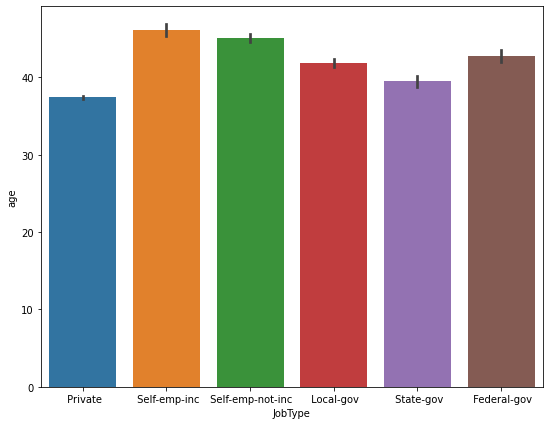

In [212]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='JobType',y='age')
plt.show()

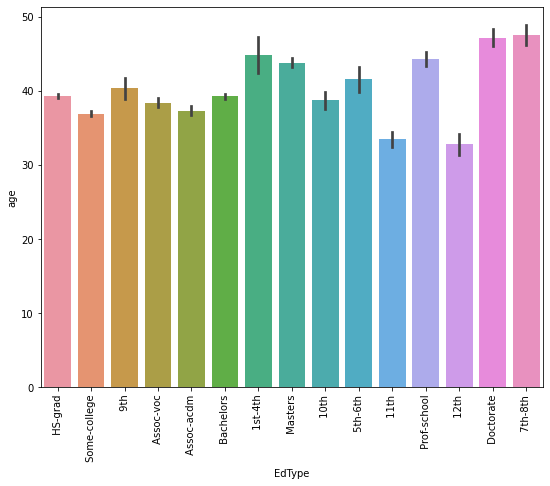

In [213]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='EdType',y='age')
plt.show()

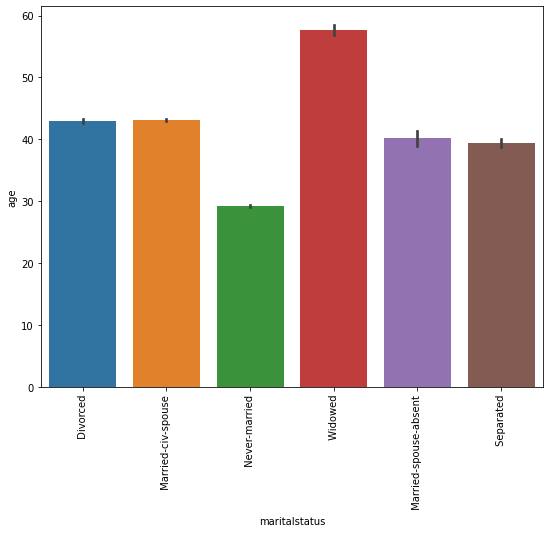

In [214]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='maritalstatus',y='age')
plt.show()

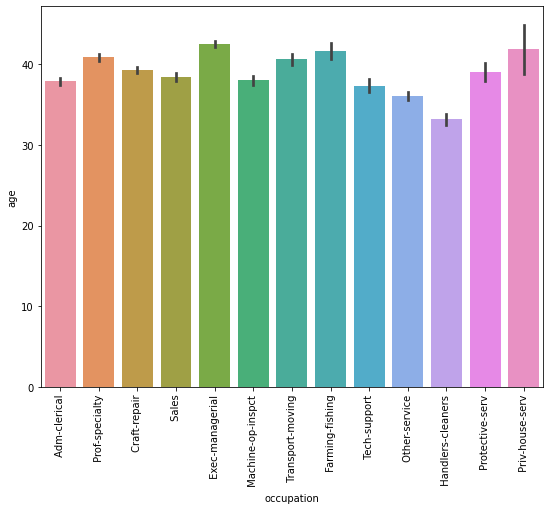

In [215]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='occupation',y='age')
plt.show()

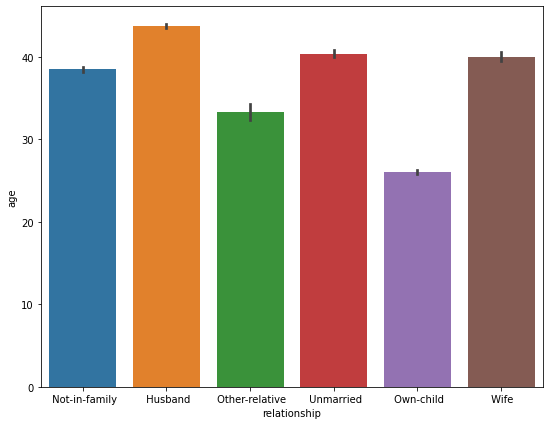

In [216]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='relationship',y='age')
plt.show()

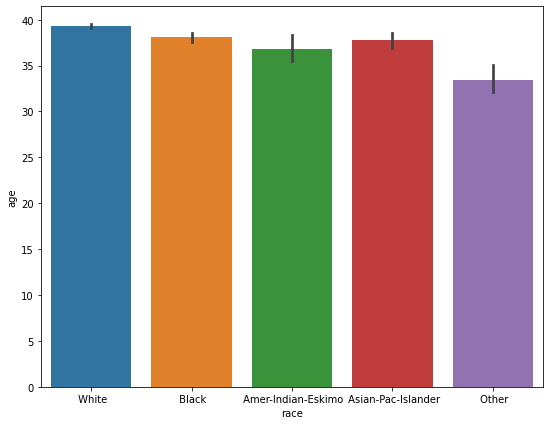

In [217]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='race',y='age')
plt.show()

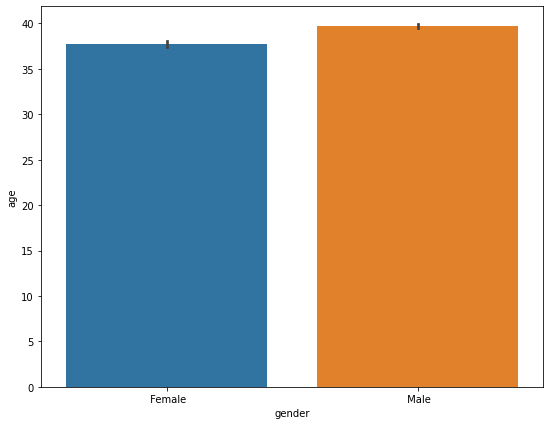

In [218]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='gender',y='age')
plt.show()

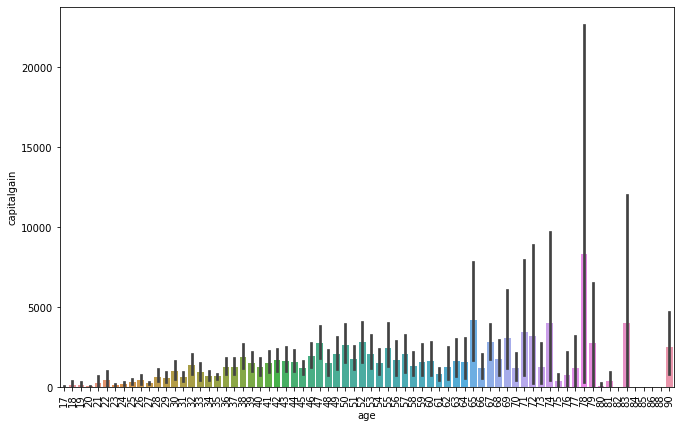

In [219]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='age',y='capitalgain')
plt.show()

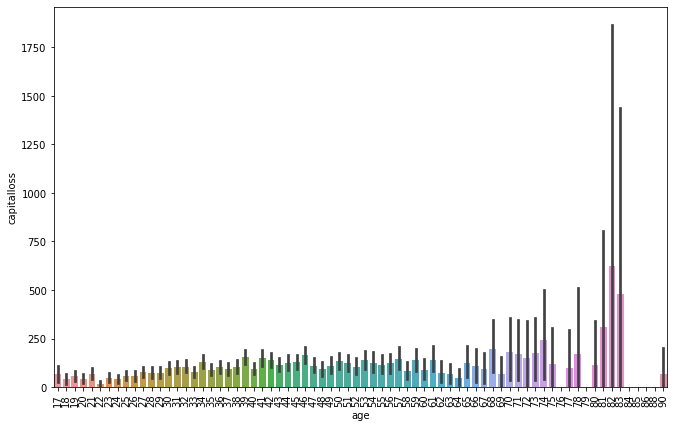

In [220]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='age',y='capitalloss')
plt.show()

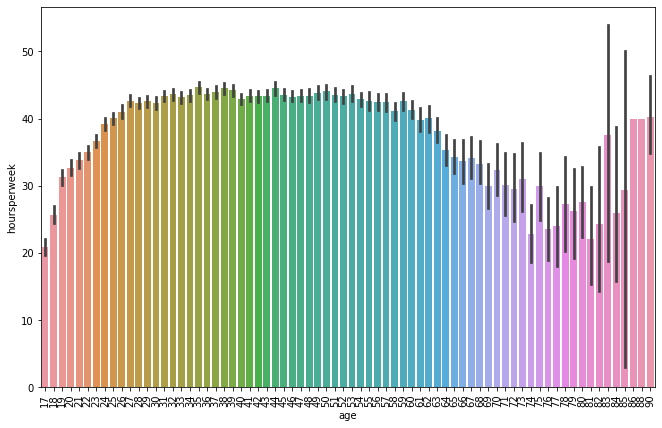

In [221]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='age',y='hoursperweek')
plt.show()

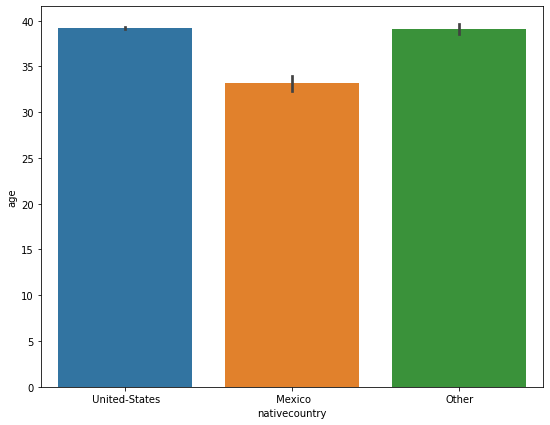

In [222]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='nativecountry',y='age')
plt.show()

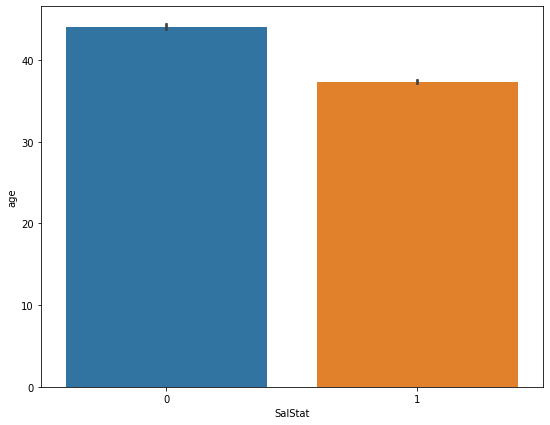

In [223]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='SalStat',y='age')
plt.show()

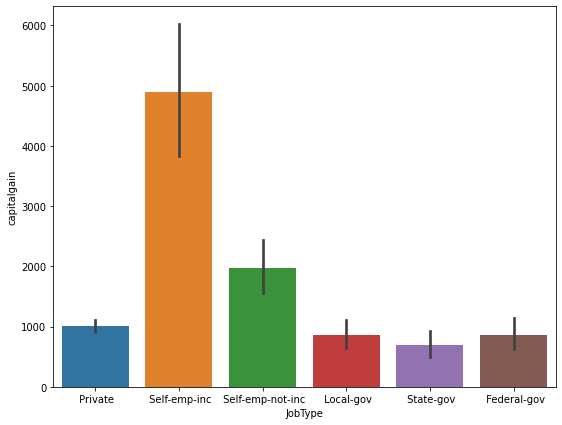

In [224]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='JobType',y='capitalgain')
plt.show()

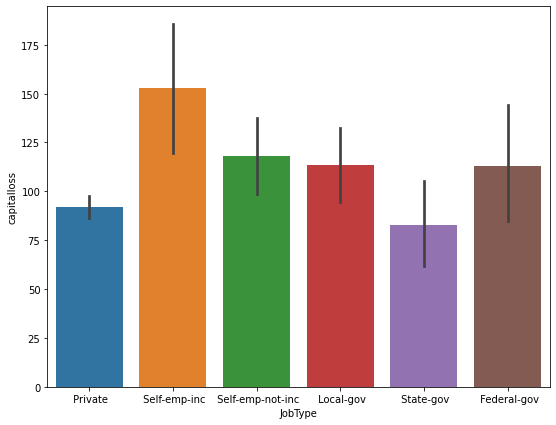

In [225]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='JobType',y='capitalloss')
plt.show()

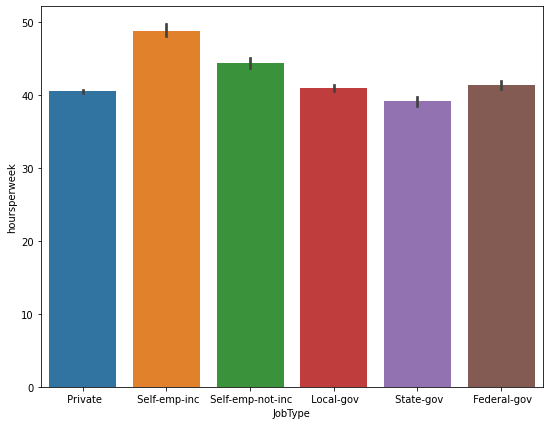

In [226]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='JobType',y='hoursperweek')
plt.show()

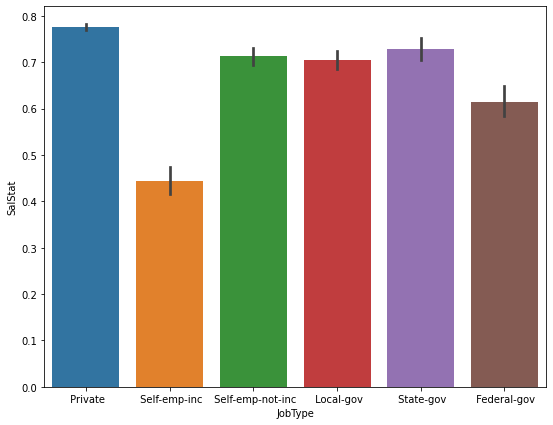

In [227]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='JobType',y='SalStat')
plt.show()

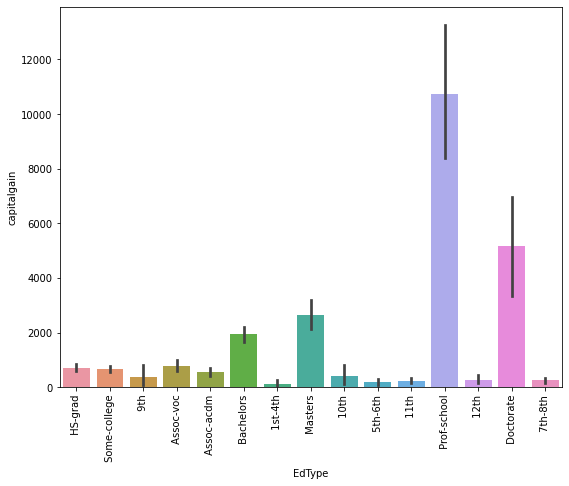

In [228]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='EdType',y='capitalgain')
plt.show()

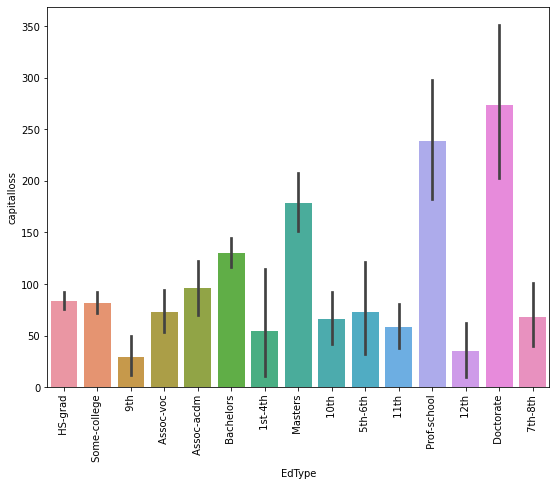

In [229]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='EdType',y='capitalloss')
plt.show()

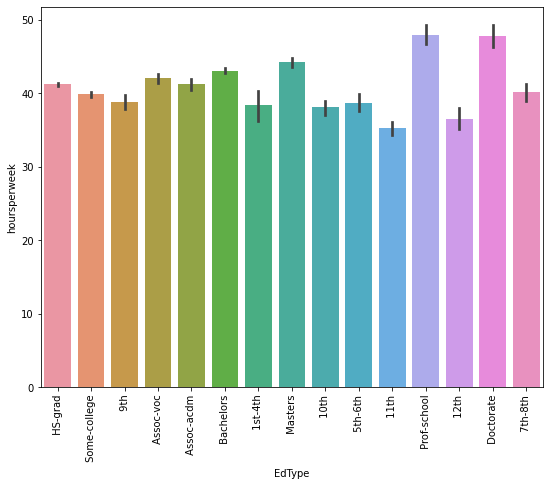

In [230]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='EdType',y='hoursperweek')
plt.show()

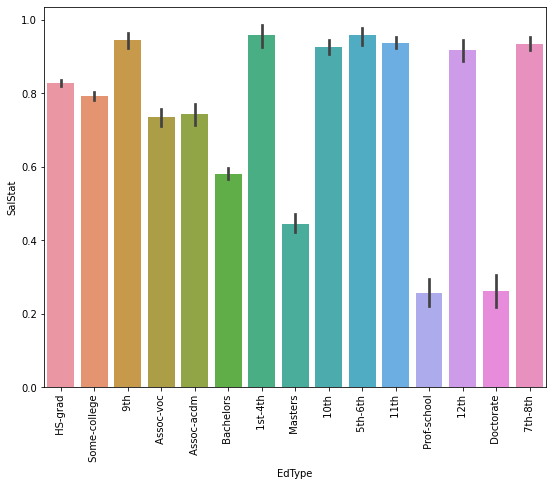

In [231]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='EdType',y='SalStat')
plt.show()

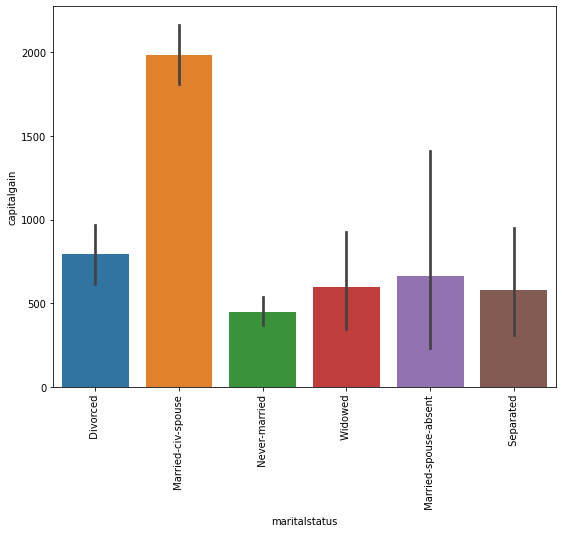

In [232]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='maritalstatus',y='capitalgain')
plt.show()

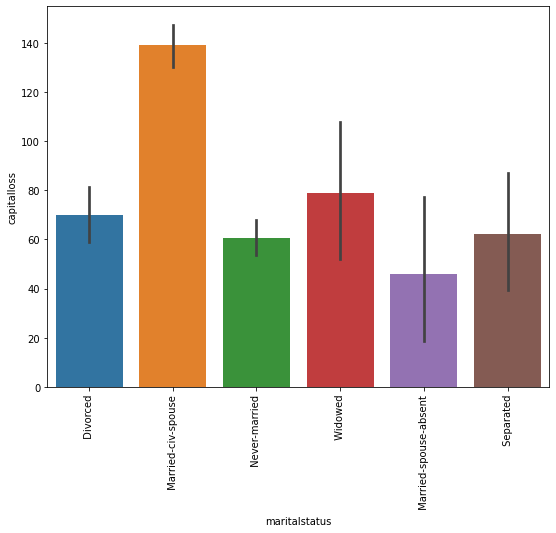

In [233]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='maritalstatus',y='capitalloss')
plt.show()

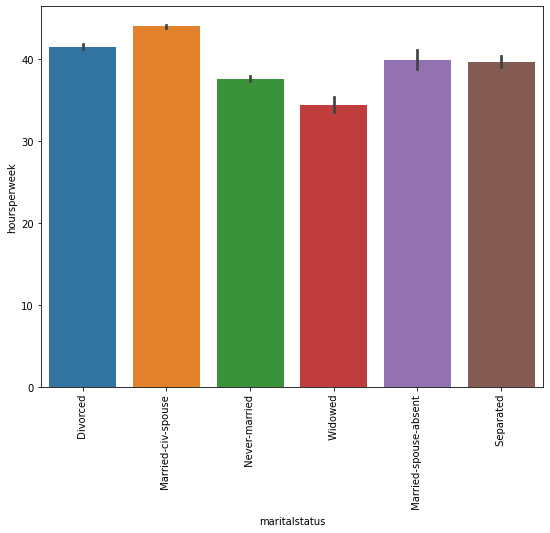

In [234]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='maritalstatus',y='hoursperweek')
plt.show()

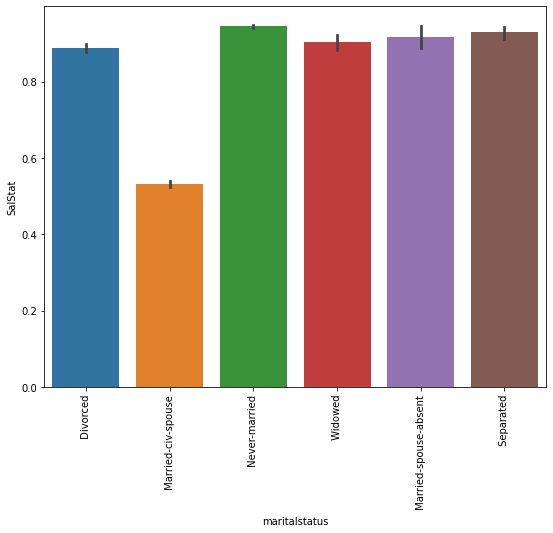

In [235]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='maritalstatus',y='SalStat')
plt.show()

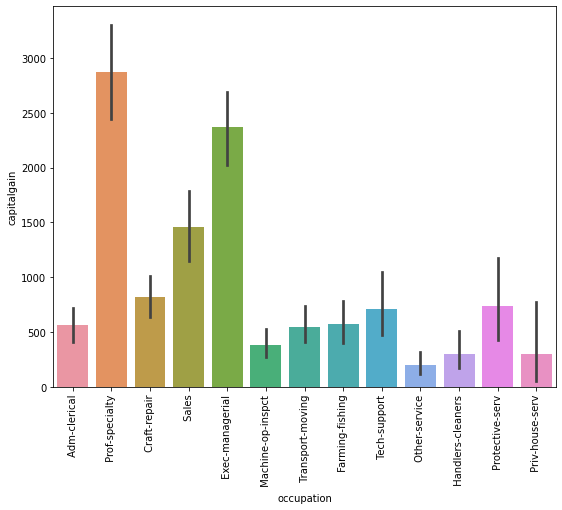

In [236]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='occupation',y='capitalgain')
plt.show()

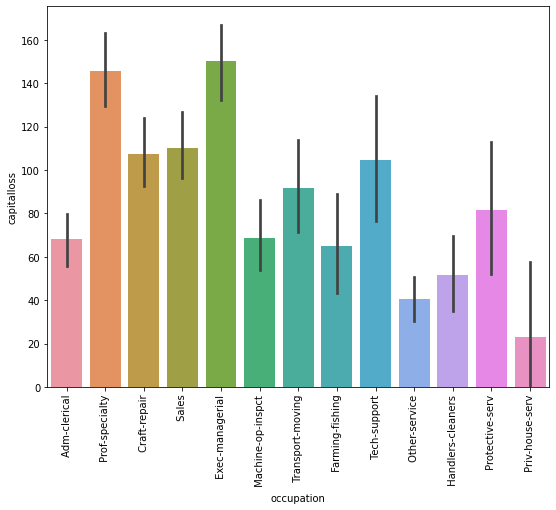

In [237]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='occupation',y='capitalloss')
plt.show()

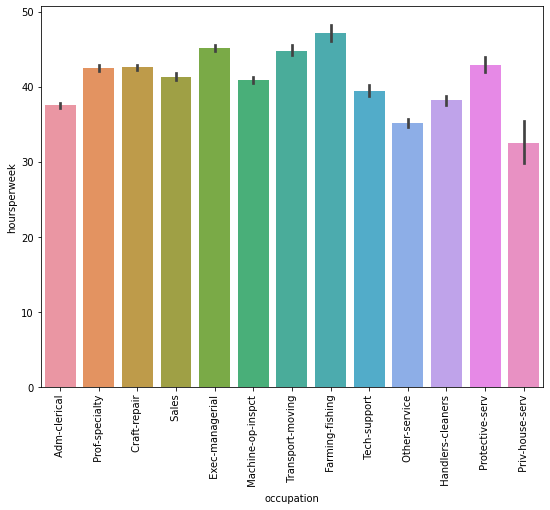

In [238]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='occupation',y='hoursperweek')
plt.show()

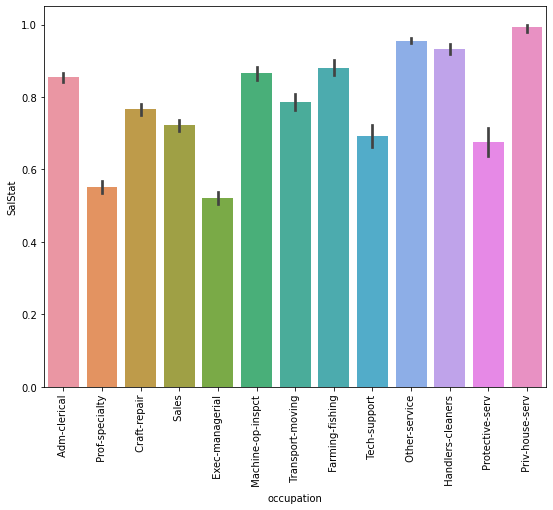

In [239]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='occupation',y='SalStat')
plt.show()

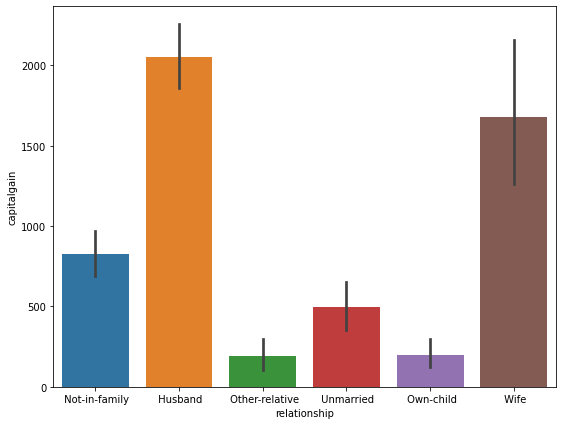

In [240]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='relationship',y='capitalgain')
plt.show()

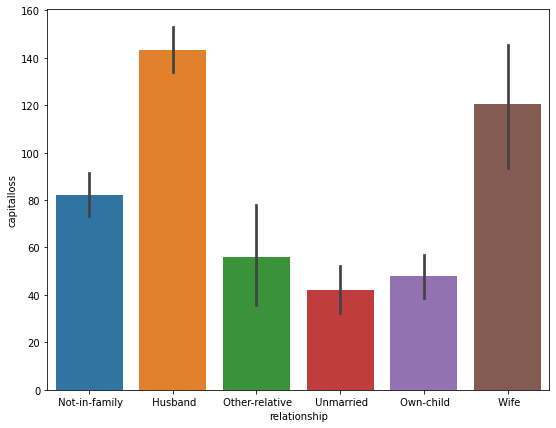

In [241]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='relationship',y='capitalloss')
plt.show()

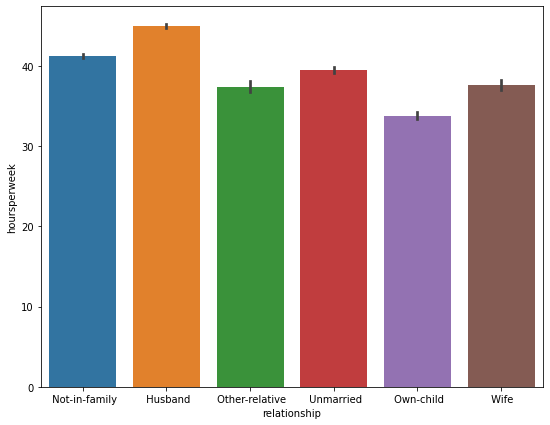

In [242]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='relationship',y='hoursperweek')
plt.show()

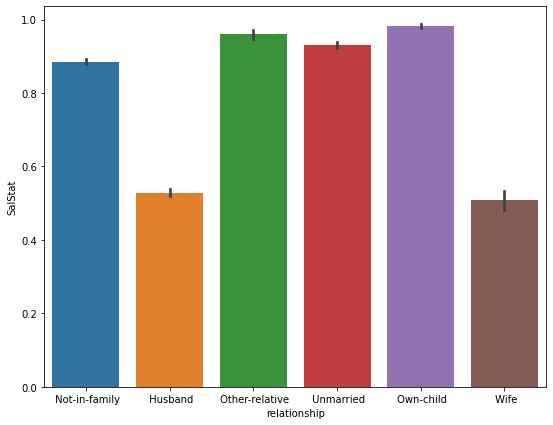

In [243]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='relationship',y='SalStat')
plt.show()

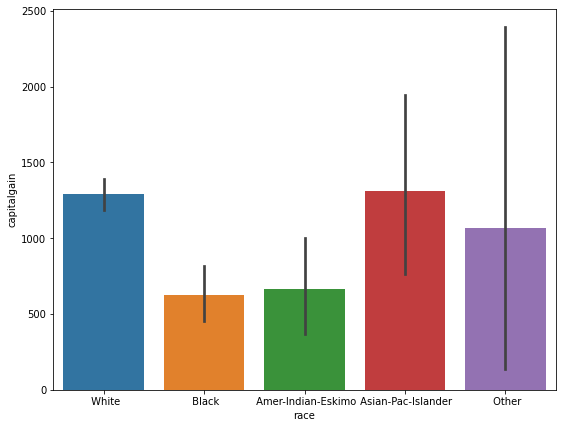

In [244]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='race',y='capitalgain')
plt.show()

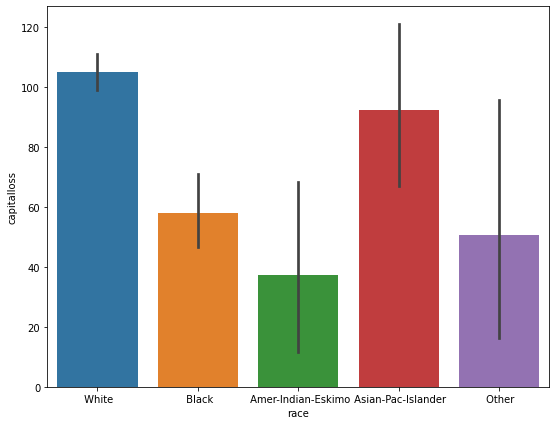

In [245]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='race',y='capitalloss')
plt.show()

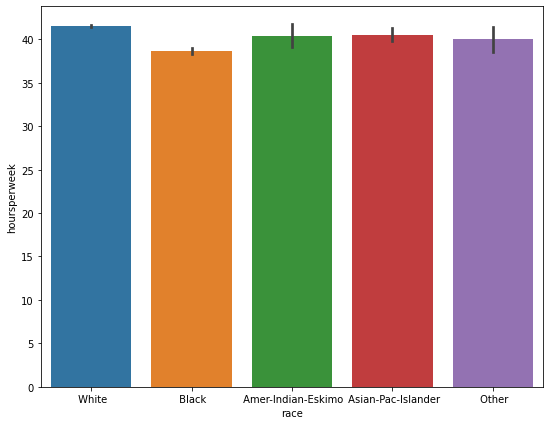

In [246]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='race',y='hoursperweek')
plt.show()

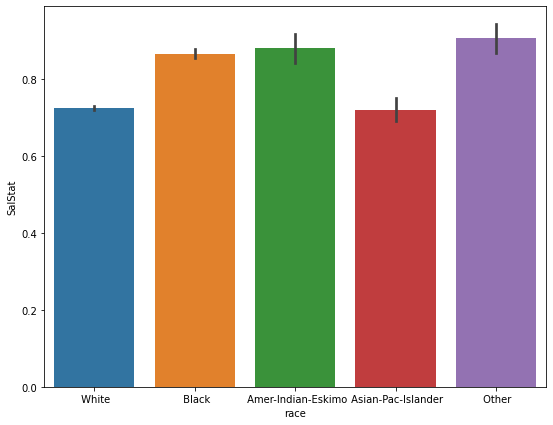

In [247]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='race',y='SalStat')
plt.show()

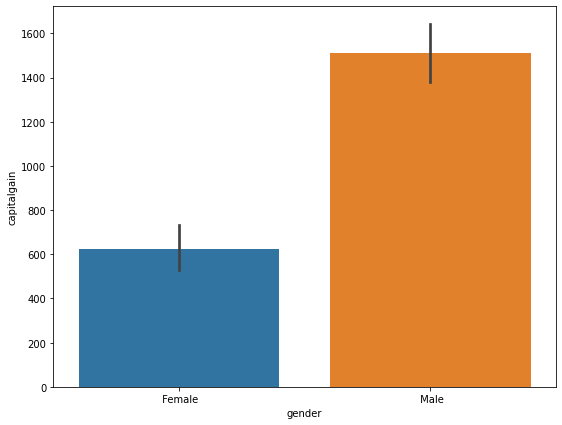

In [248]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='gender',y='capitalgain')
plt.show()

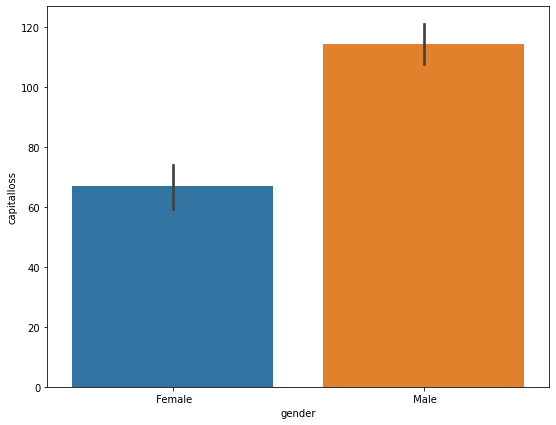

In [249]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='gender',y='capitalloss')
plt.show()

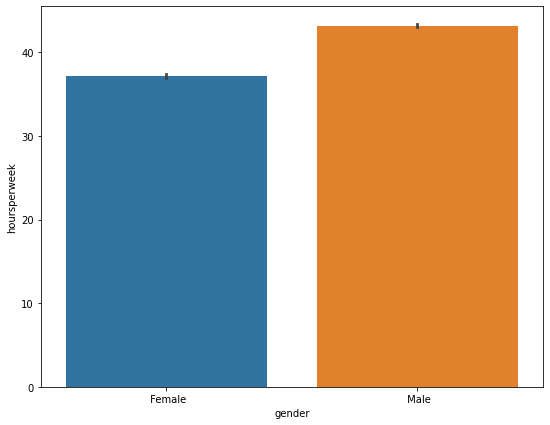

In [250]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='gender',y='hoursperweek')
plt.show()

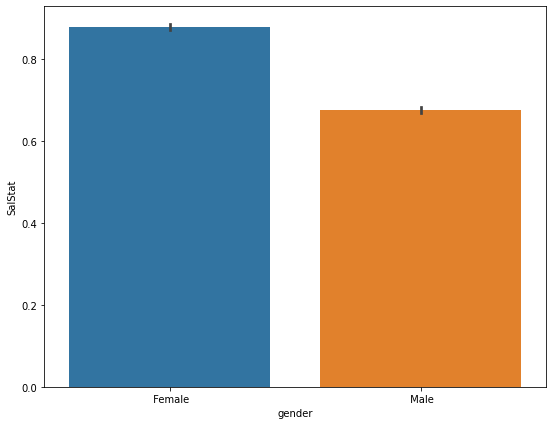

In [251]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='gender',y='SalStat')
plt.show()

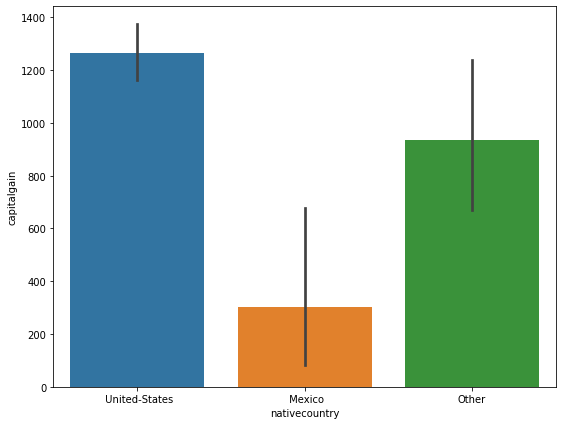

In [252]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='nativecountry',y='capitalgain')
plt.show()

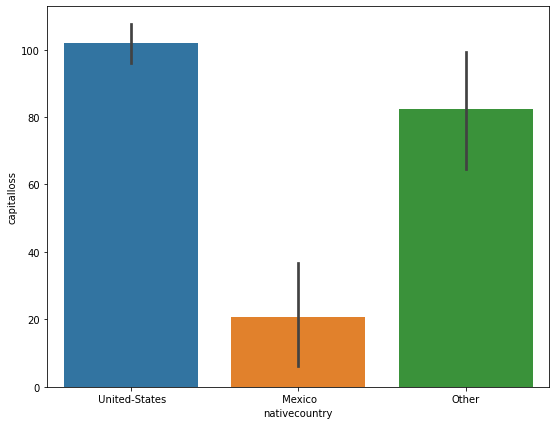

In [253]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='nativecountry',y='capitalloss')
plt.show()

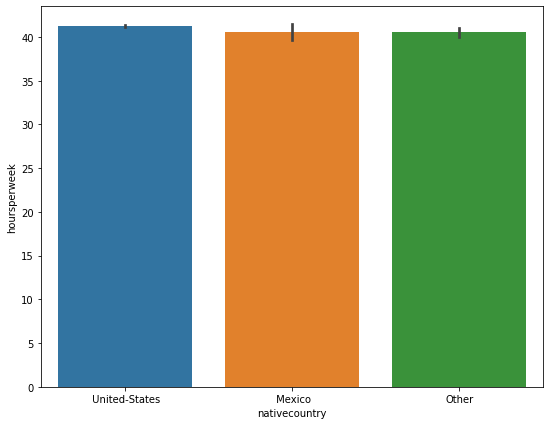

In [254]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='nativecountry',y='hoursperweek')
plt.show()

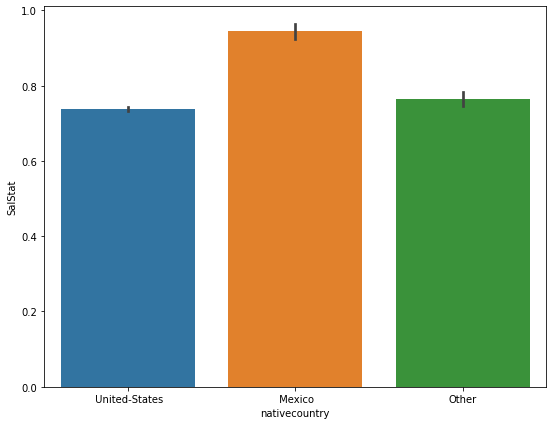

In [255]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='nativecountry',y='SalStat')
plt.show()

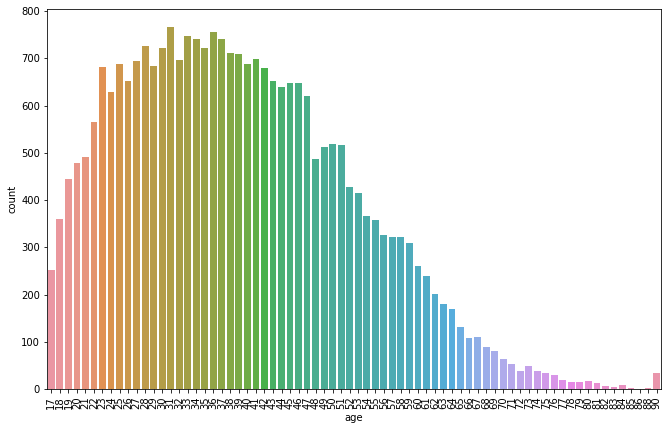

In [256]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.countplot(data=df,x='age')
plt.show()

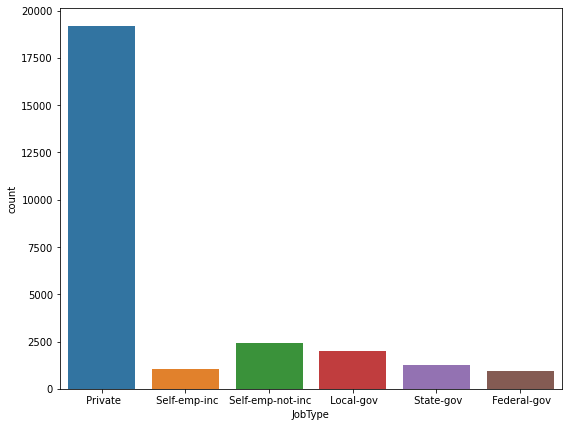

In [257]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x='JobType')
plt.show()

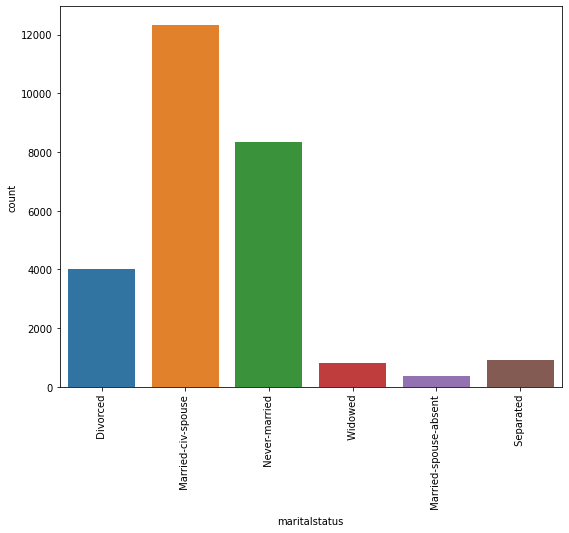

In [258]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.countplot(data=df,x='maritalstatus')
plt.show()

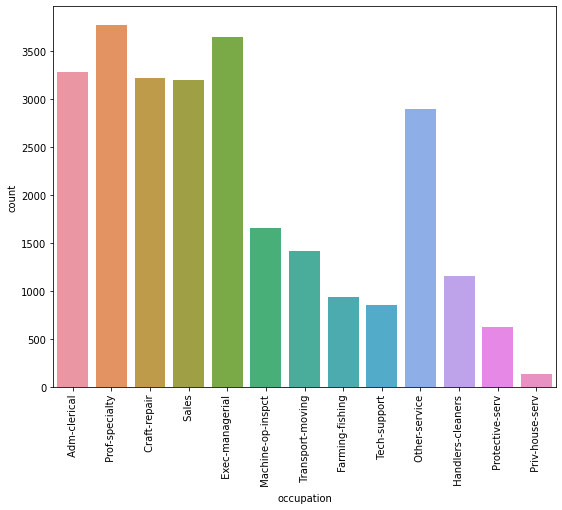

In [259]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.countplot(data=df,x='occupation')
plt.show()

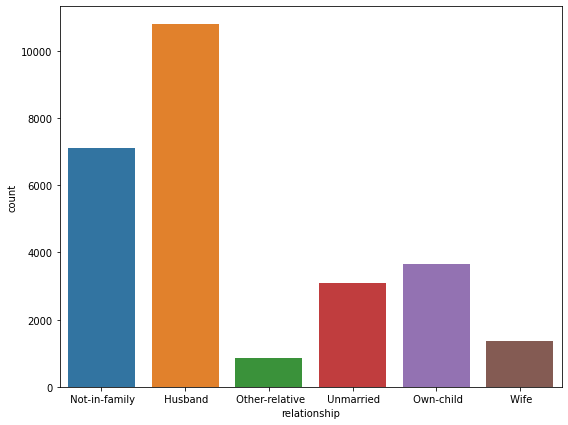

In [260]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x='relationship')
plt.show()

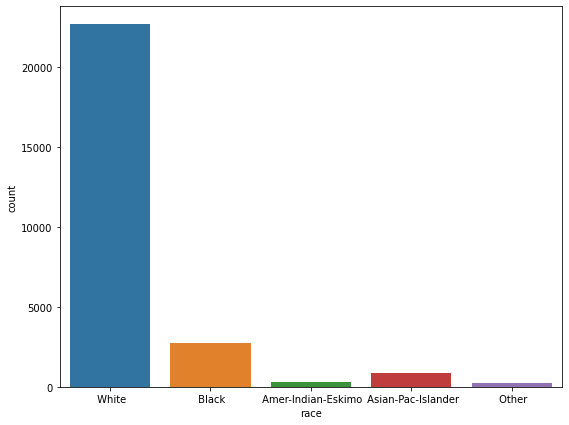

In [261]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x='race')
plt.show()

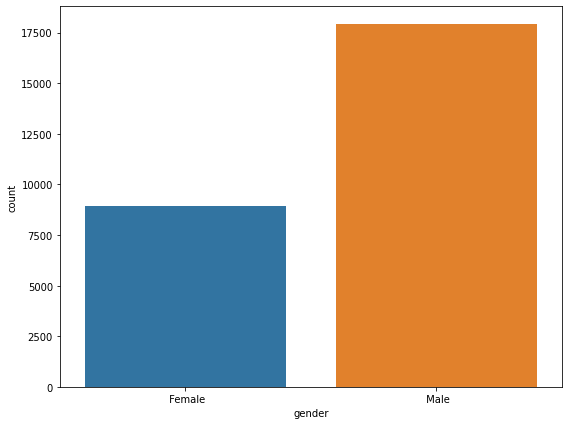

In [262]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x='gender')
plt.show()

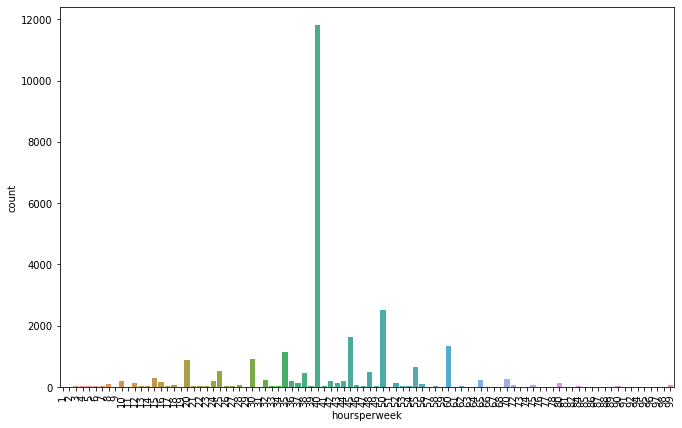

In [263]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.countplot(data=df,x='hoursperweek')
plt.show()

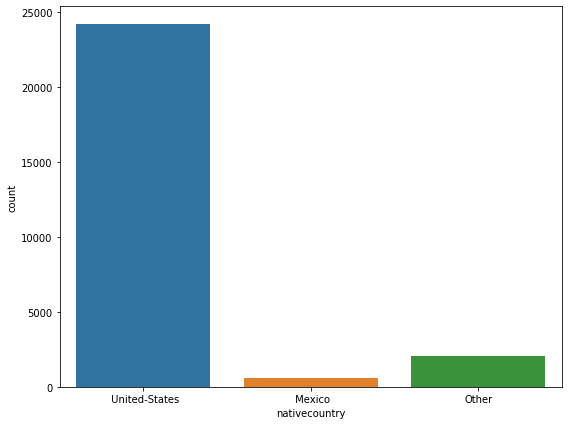

In [264]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x='nativecountry')
plt.show()

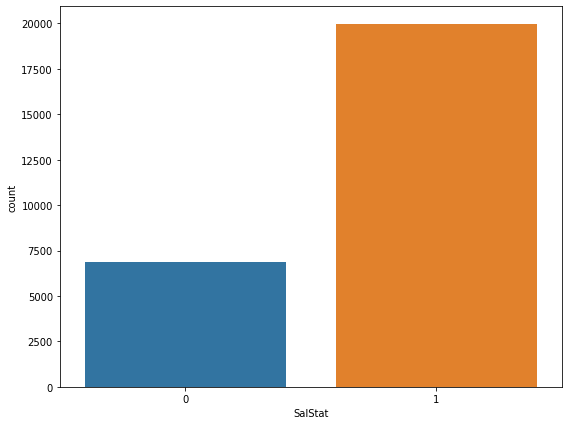

In [265]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x='SalStat')
plt.show()

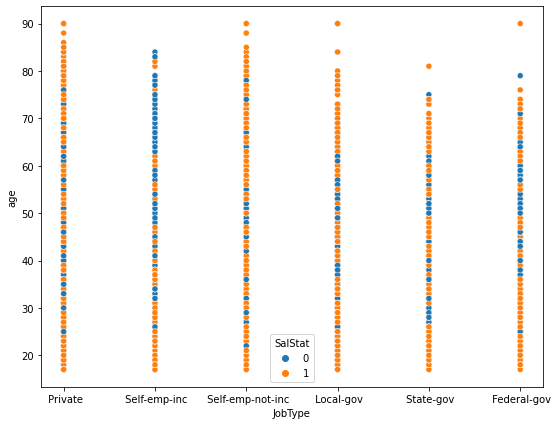

In [266]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='JobType',y='age',hue='SalStat')
plt.show()

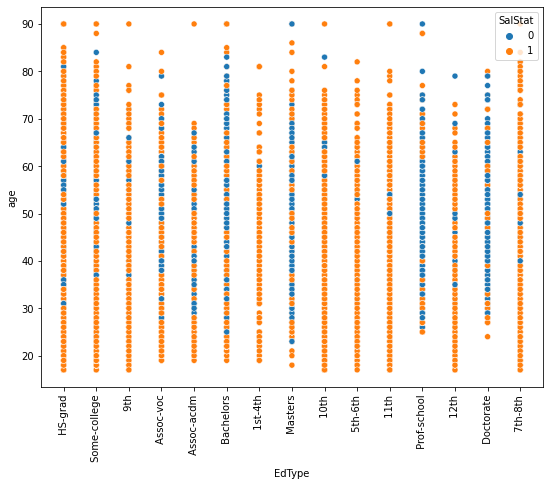

In [267]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='EdType',y='age',hue='SalStat')
plt.show()

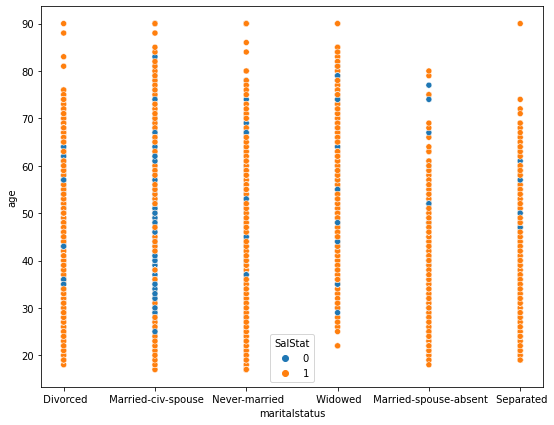

In [268]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='maritalstatus',y='age',hue='SalStat')
plt.show()

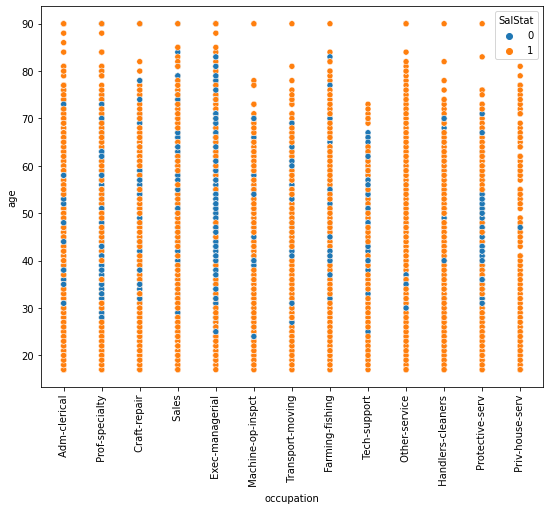

In [269]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='occupation',y='age',hue='SalStat')
plt.show()

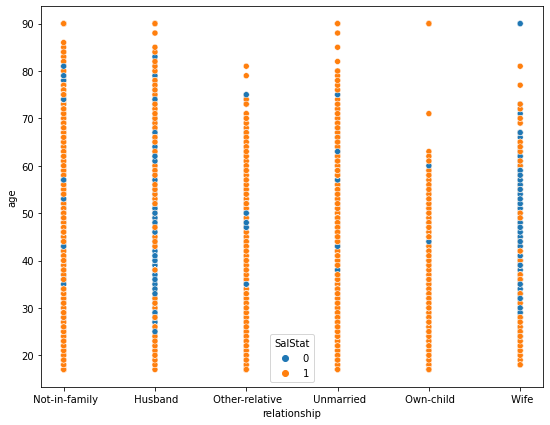

In [270]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='relationship',y='age',hue='SalStat')
plt.show()

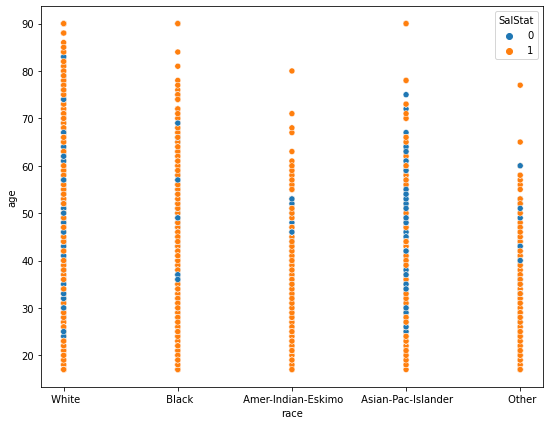

In [271]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='race',y='age',hue='SalStat')
plt.show()

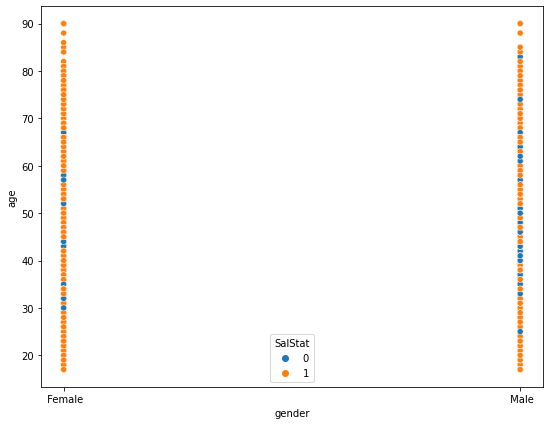

In [272]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='gender',y='age',hue='SalStat')
plt.show()

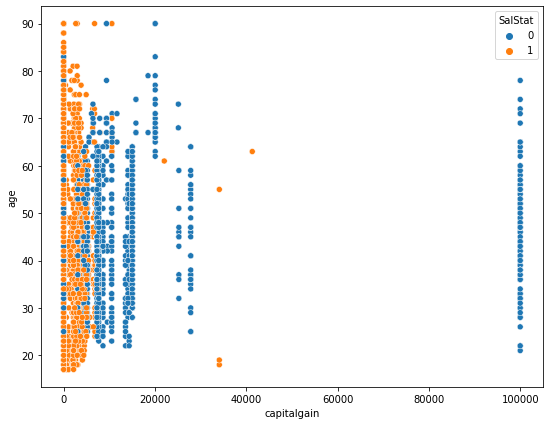

In [273]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='capitalgain',y='age',hue='SalStat')
plt.show()

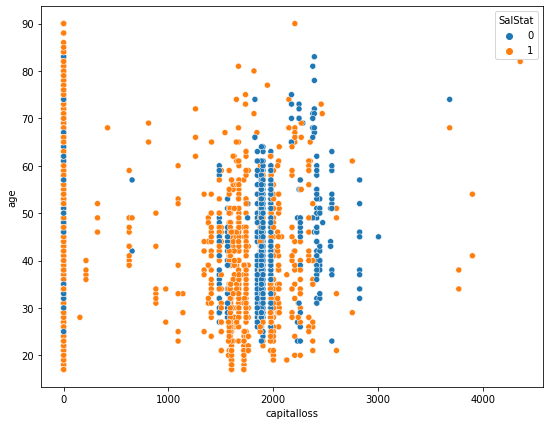

In [274]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='capitalloss',y='age',hue='SalStat')
plt.show()

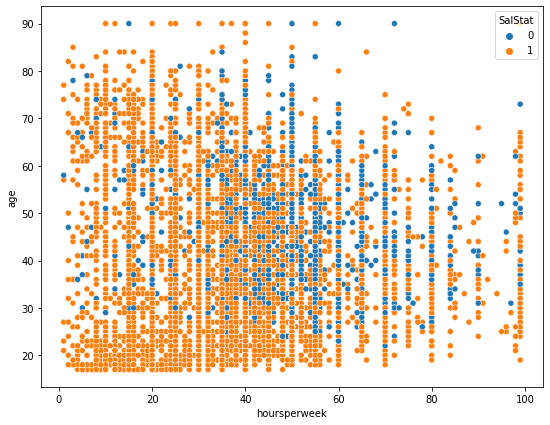

In [275]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='hoursperweek',y='age',hue='SalStat')
plt.show()

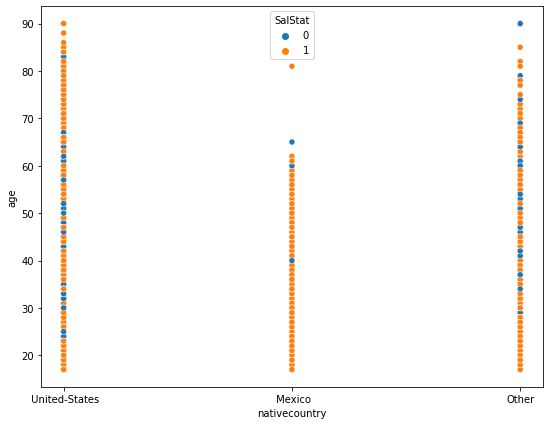

In [276]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='nativecountry',y='age',hue='SalStat')
plt.show()

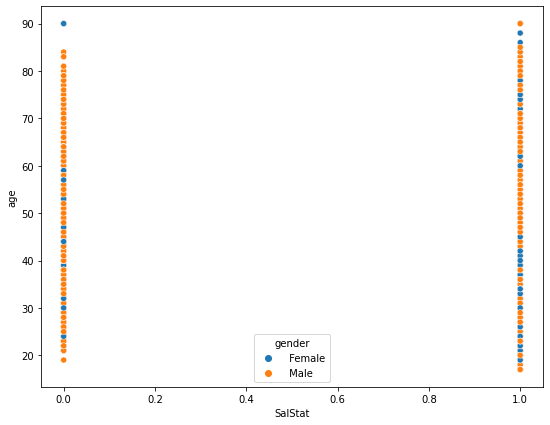

In [277]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='SalStat',y='age',hue='gender')
plt.show()

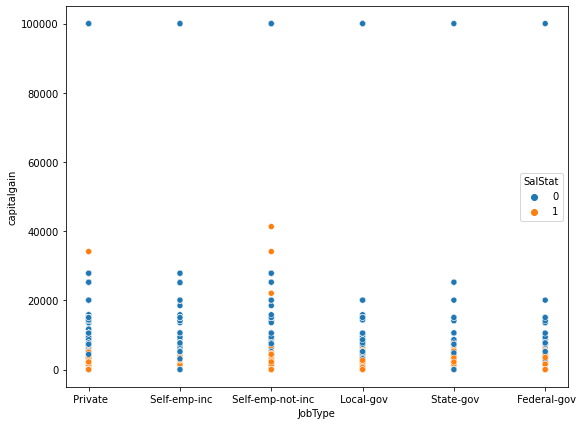

In [278]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='JobType',y='capitalgain',hue='SalStat')
plt.show()

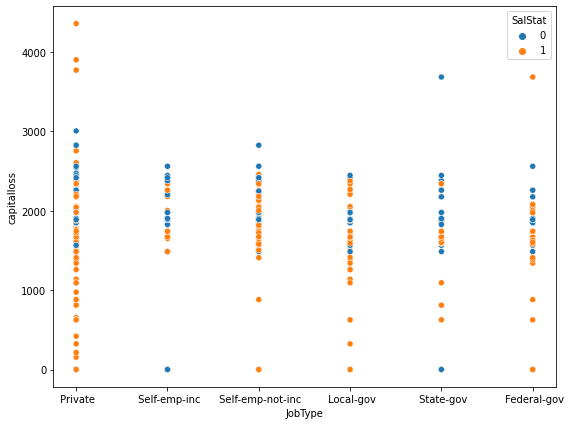

In [279]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='JobType',y='capitalloss',hue='SalStat')
plt.show()

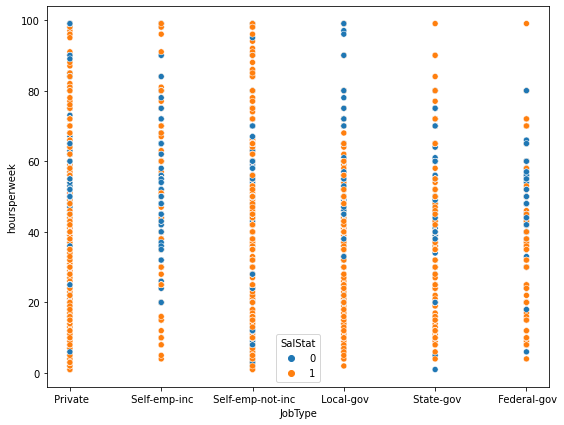

In [280]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='JobType',y='hoursperweek',hue='SalStat')
plt.show()

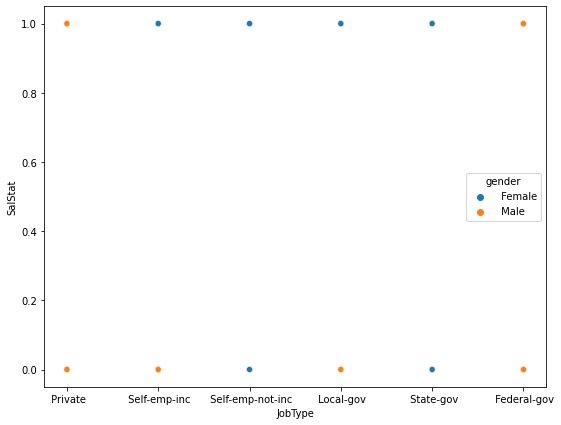

In [281]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='JobType',y='SalStat',hue='gender')
plt.show()

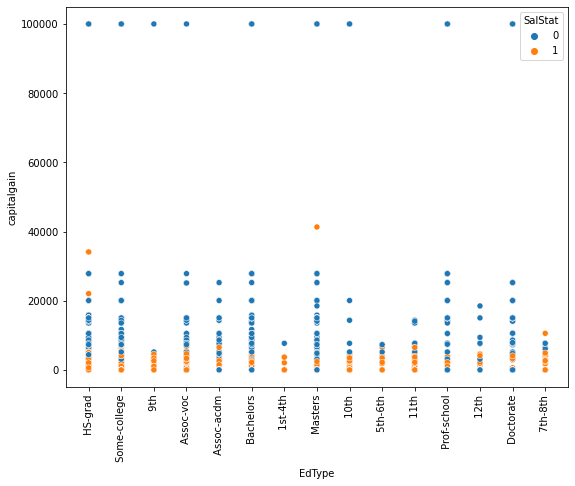

In [282]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='EdType',y='capitalgain',hue='SalStat')
plt.show()

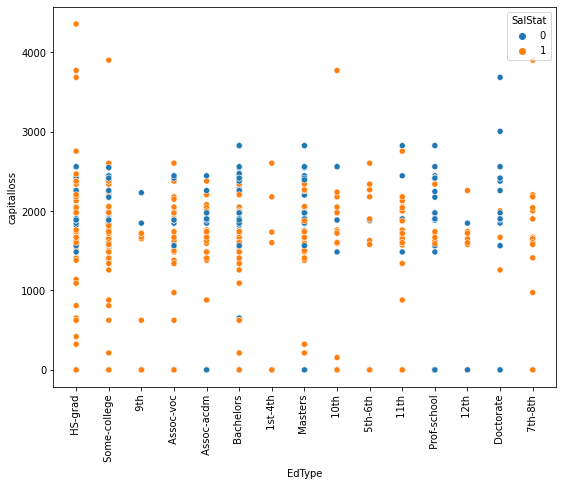

In [283]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='EdType',y='capitalloss',hue='SalStat')
plt.show()

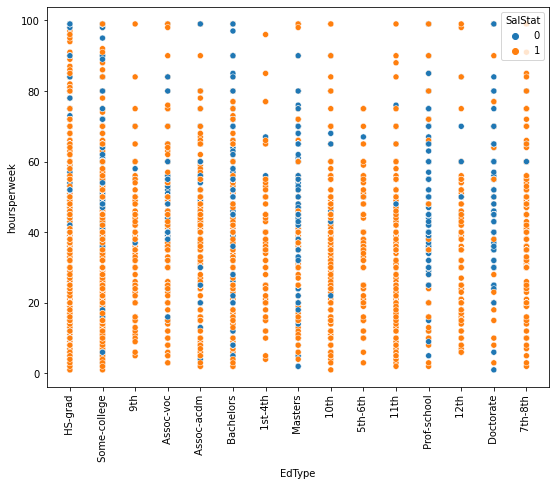

In [284]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='EdType',y='hoursperweek',hue='SalStat')
plt.show()

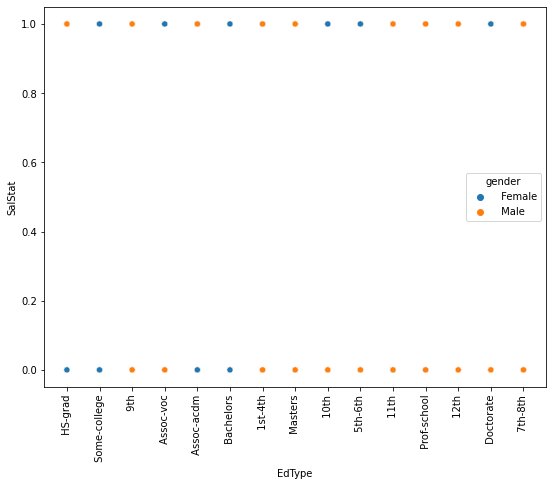

In [285]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='EdType',y='SalStat',hue='gender')
plt.show()

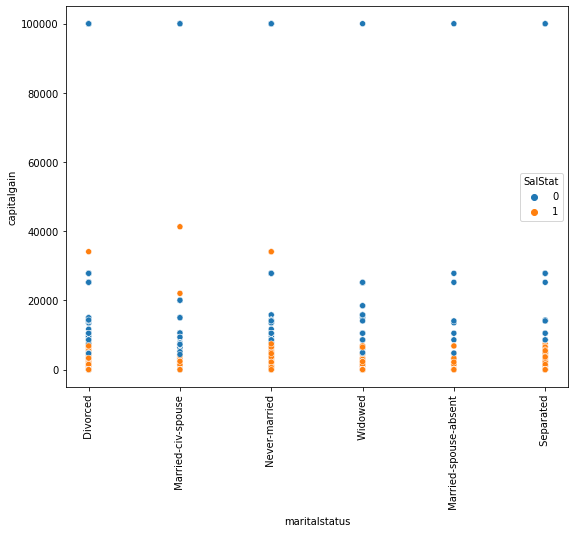

In [286]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='maritalstatus',y='capitalgain',hue='SalStat')
plt.show()

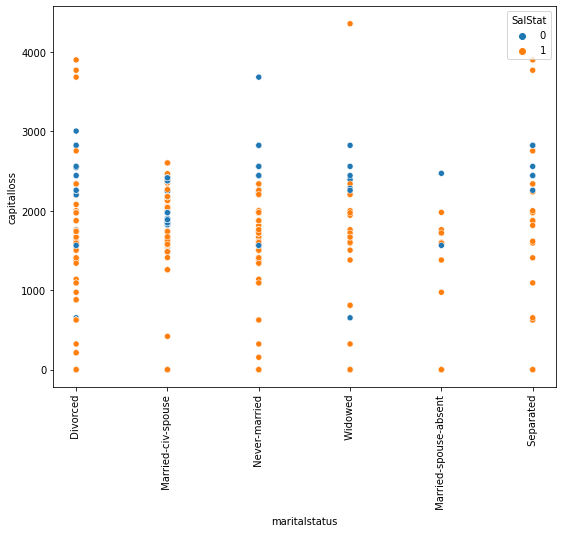

In [287]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='maritalstatus',y='capitalloss',hue='SalStat')
plt.show()

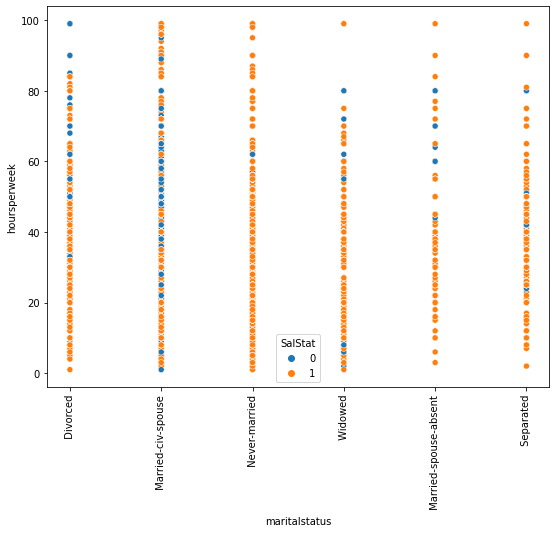

In [288]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='maritalstatus',y='hoursperweek',hue='SalStat')
plt.show()

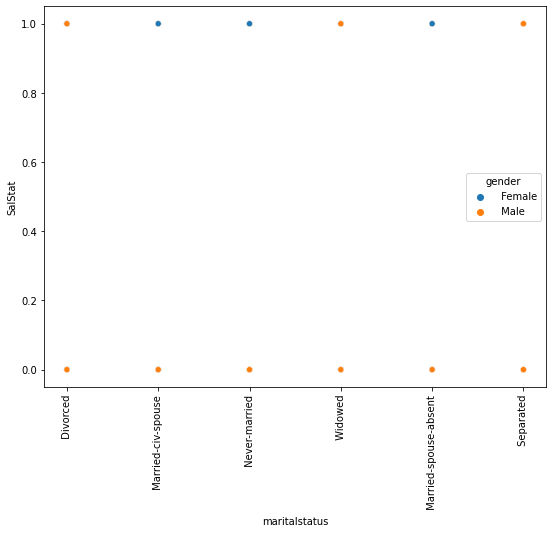

In [289]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='maritalstatus',y='SalStat',hue='gender')
plt.show()

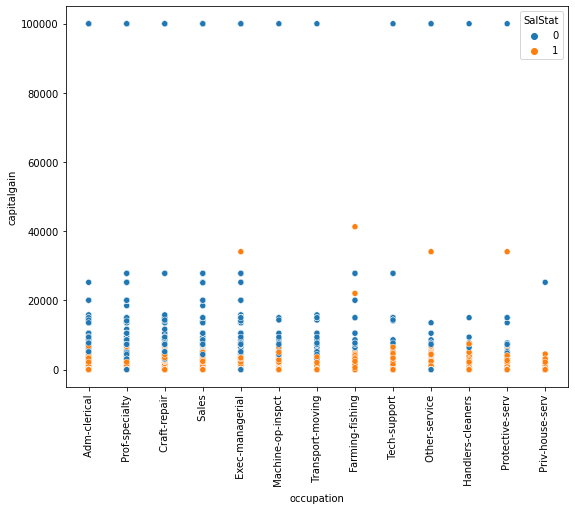

In [290]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='occupation',y='capitalgain',hue='SalStat')
plt.show()

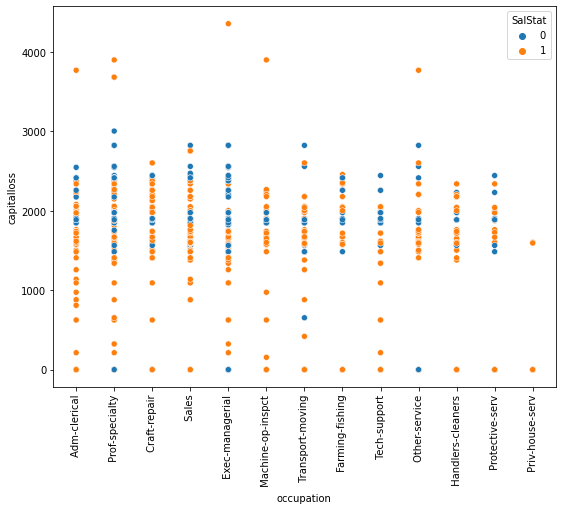

In [291]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='occupation',y='capitalloss',hue='SalStat')
plt.show()

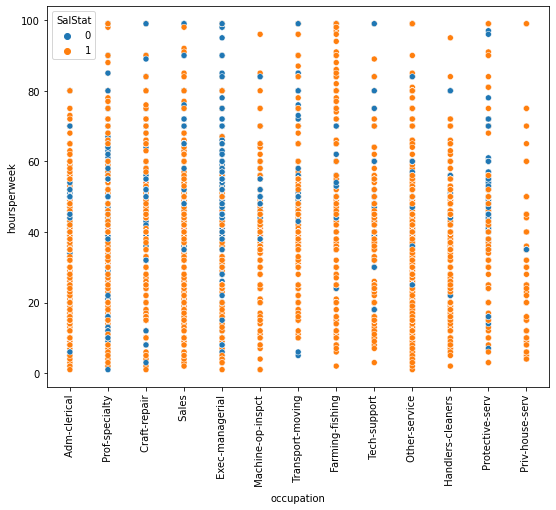

In [292]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='occupation',y='hoursperweek',hue='SalStat')
plt.show()

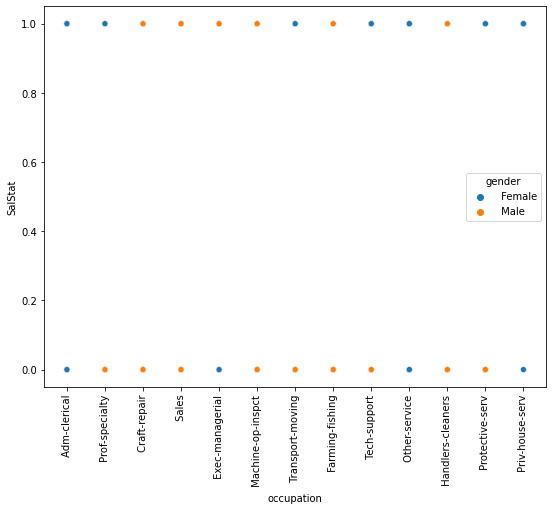

In [293]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.scatterplot(data=df,x='occupation',y='SalStat',hue='gender')
plt.show()

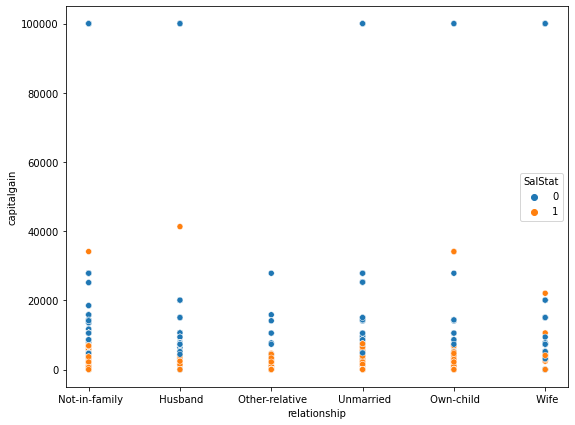

In [294]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='relationship',y='capitalgain',hue='SalStat')
plt.show()

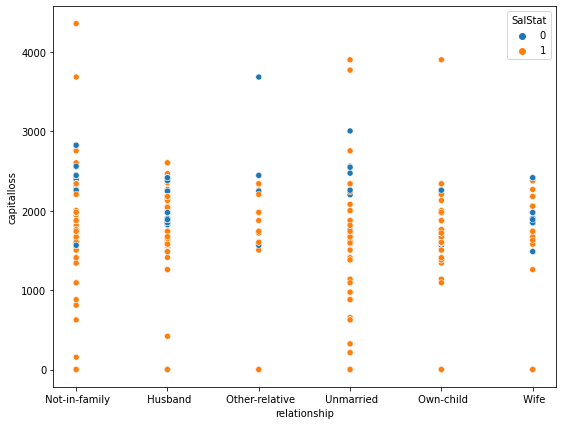

In [295]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='relationship',y='capitalloss',hue='SalStat')
plt.show()

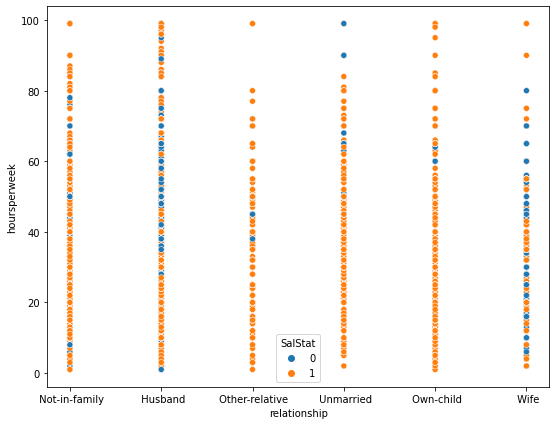

In [296]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='relationship',y='hoursperweek',hue='SalStat')
plt.show()

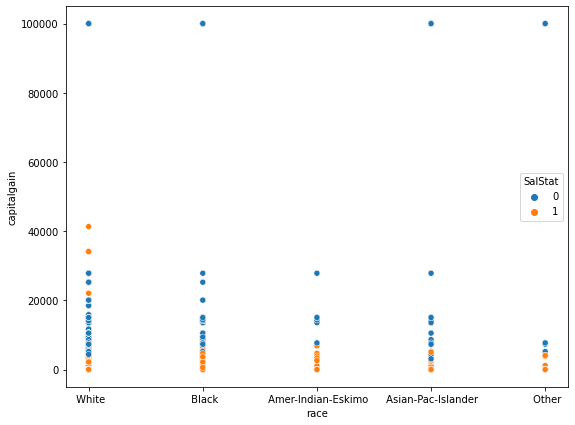

In [297]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='race',y='capitalgain',hue='SalStat')
plt.show()

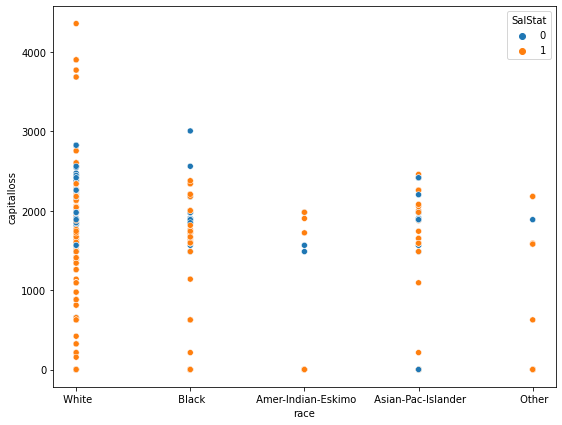

In [298]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='race',y='capitalloss',hue='SalStat')
plt.show()

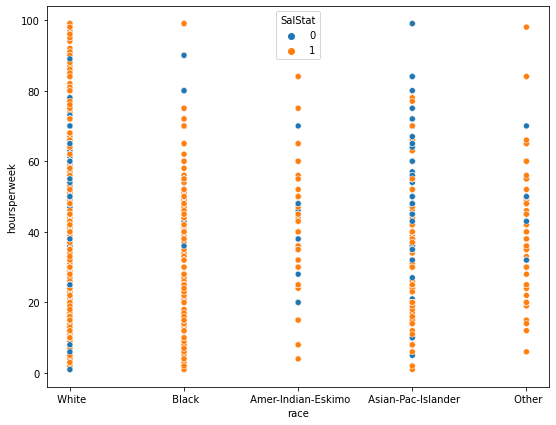

In [299]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='race',y='hoursperweek',hue='SalStat')
plt.show()

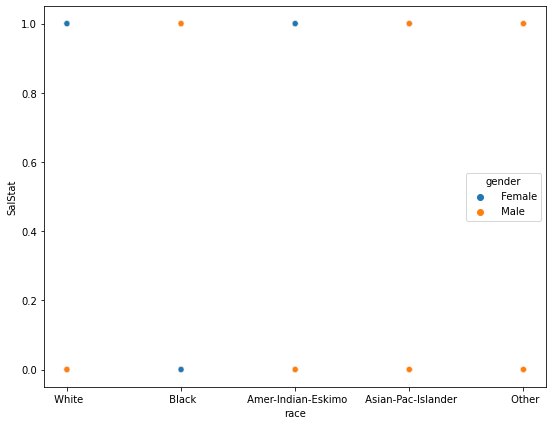

In [300]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='race',y='SalStat',hue='gender')
plt.show()

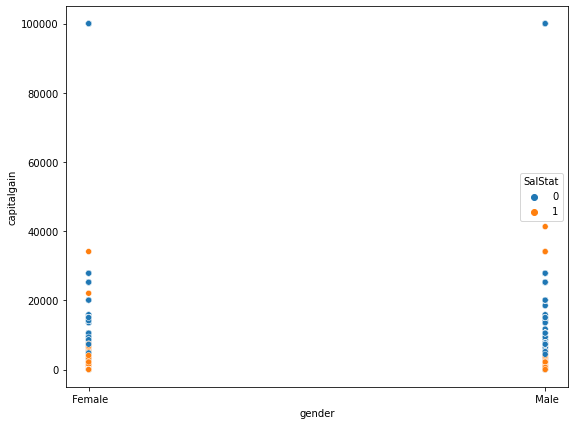

In [301]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='gender',y='capitalgain',hue='SalStat')
plt.show()

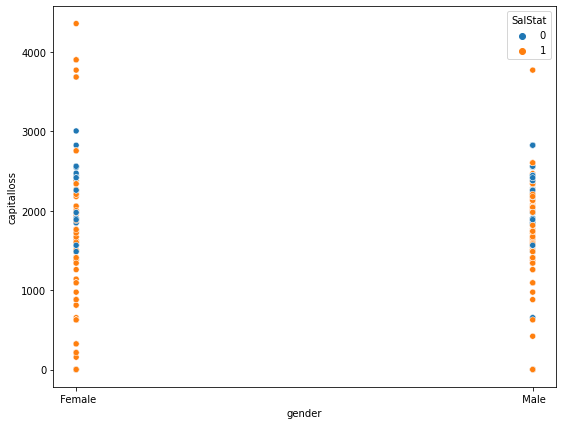

In [302]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='gender',y='capitalloss',hue='SalStat')
plt.show()

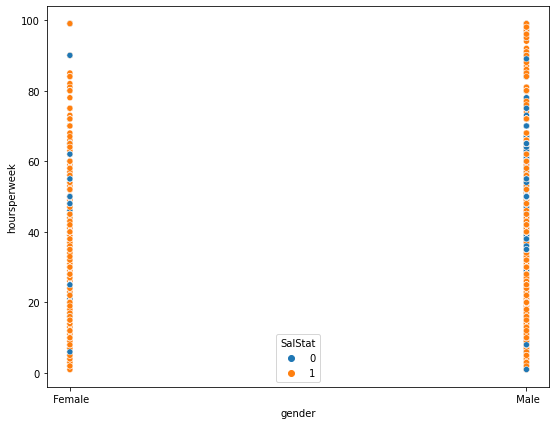

In [303]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='gender',y='hoursperweek',hue='SalStat')
plt.show()

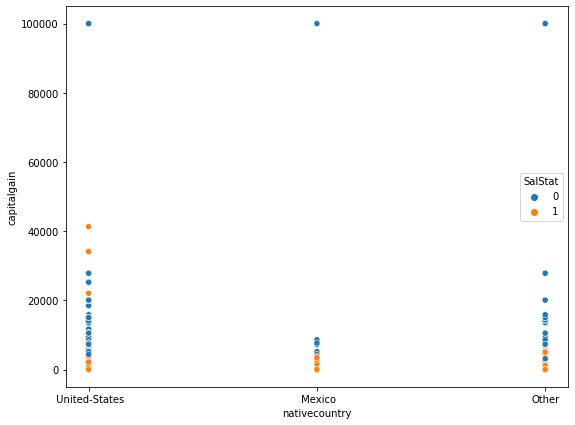

In [304]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='nativecountry',y='capitalgain',hue='SalStat')
plt.show()

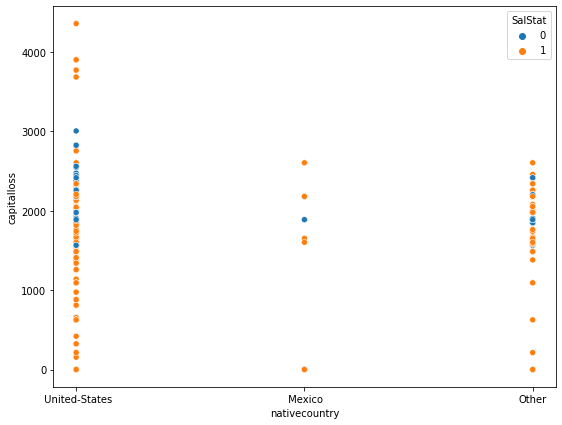

In [305]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='nativecountry',y='capitalloss',hue='SalStat')
plt.show()

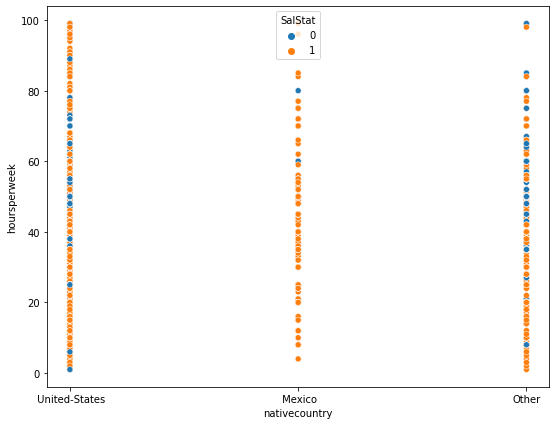

In [306]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='nativecountry',y='hoursperweek',hue='SalStat')
plt.show()

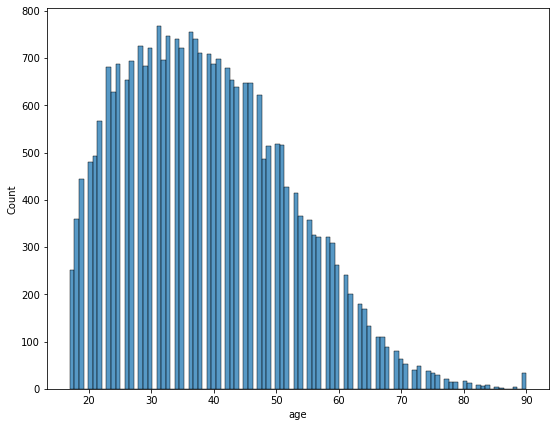

In [307]:
plt.figure(figsize=(9,7))
sns.histplot(data=df,x='age',bins=100)
plt.show()

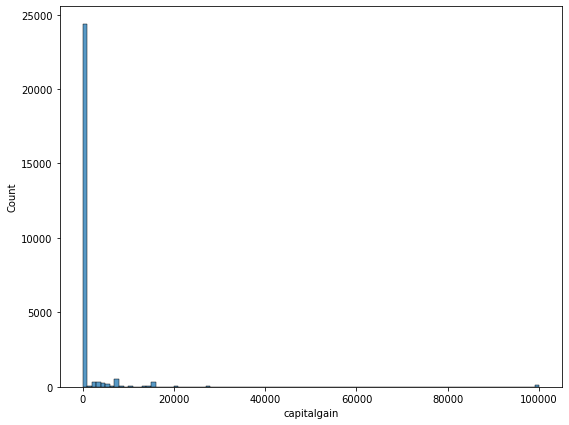

In [308]:
plt.figure(figsize=(9,7))
sns.histplot(data=df,x='capitalgain',bins=100)
plt.show()

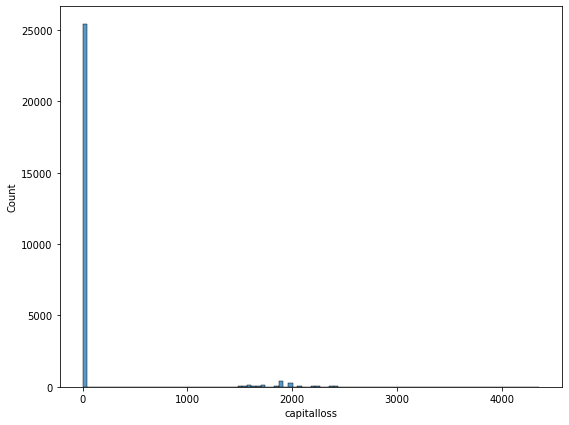

In [309]:
plt.figure(figsize=(9,7))
sns.histplot(data=df,x='capitalloss',bins=100)
plt.show()

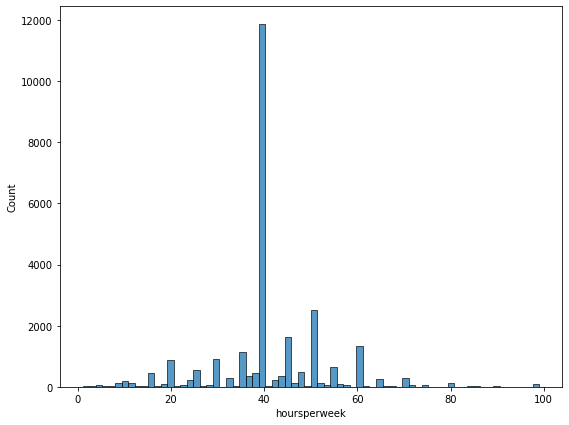

In [310]:
plt.figure(figsize=(9,7))
sns.histplot(data=df,x='hoursperweek',bins=70)
plt.show()

In [311]:
# SalStat = less than or equal to 50,000 : 1 , greater than 50,000 : 0
df.groupby(['SalStat']).mean()

C:\Users\power\AppData\Local\Temp\ipykernel_4492\2721344856.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['SalStat']).mean()


,age,capitalgain,capitalloss,hoursperweek
SalStat,,,,
0,44.096084,4268.643325,209.754258,45.926627
1,37.311526,166.331428,60.365970,39.537725


In [312]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(f'{i}:{df[i].unique()}')

JobType:[' Private' ' Self-emp-inc' ' Self-emp-not-inc' ' Local-gov' ' State-gov'
 ' Federal-gov']
EdType:[' HS-grad' ' Some-college' ' 9th' ' Assoc-voc' ' Assoc-acdm' ' Bachelors'
 ' 1st-4th' ' Masters' ' 10th' ' 5th-6th' ' 11th' ' Prof-school' ' 12th'
 ' Doctorate' ' 7th-8th']
maritalstatus:[' Divorced' ' Married-civ-spouse' ' Never-married' ' Widowed'
 ' Married-spouse-absent' ' Separated']
occupation:[' Adm-clerical' ' Prof-specialty' ' Craft-repair' ' Sales'
 ' Exec-managerial' ' Machine-op-inspct' ' Transport-moving'
 ' Farming-fishing' ' Tech-support' ' Other-service' ' Handlers-cleaners'
 ' Protective-serv' ' Priv-house-serv']
relationship:[' Not-in-family' ' Husband' ' Other-relative' ' Unmarried' ' Own-child'
 ' Wife']
race:[' White' ' Black' ' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Other']
gender:[' Female' ' Male']
nativecountry:[' United-States' ' Mexico' 'Other']


In [313]:
df['gender']=df['gender'].replace({' Female':0,' Male':1})

In [314]:
col=['JobType','EdType','maritalstatus','occupation','relationship','race','nativecountry']

In [315]:
df=pd.get_dummies(data=df,columns=col,drop_first=True)

In [316]:
df.head()

,age,gender,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ United-States,nativecountry_Other
0,45,0,0,0,28,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,44,1,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,27,1,0,0,40,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,20,1,0,0,35,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
5,44,0,0,0,40,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [317]:
df.shape

(26816, 53)

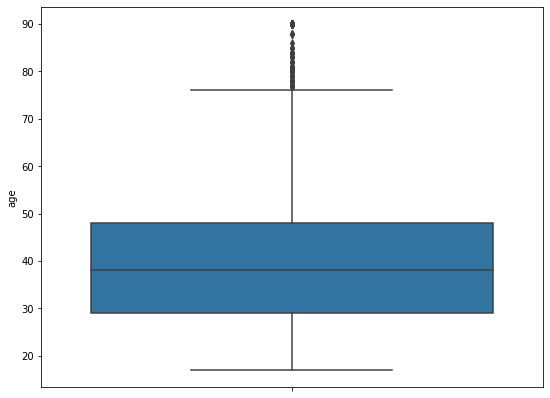

In [318]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='age')
plt.show()

In [319]:
df[df['age']>76]

,age,gender,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ United-States,nativecountry_Other
469,81,1,0,0,30,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
528,78,0,2964,0,40,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
588,90,0,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
713,88,1,0,0,40,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1465,90,1,0,0,45,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31358,90,1,2653,0,40,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
31448,85,1,0,0,3,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
31616,79,1,0,0,20,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
31763,90,1,0,2206,40,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [320]:
df=df[df['age']<76]

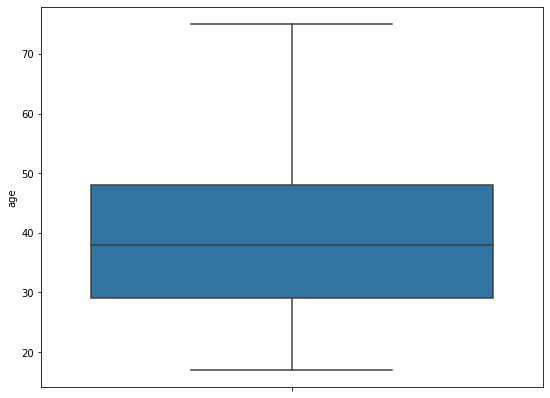

In [321]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='age')
plt.show()

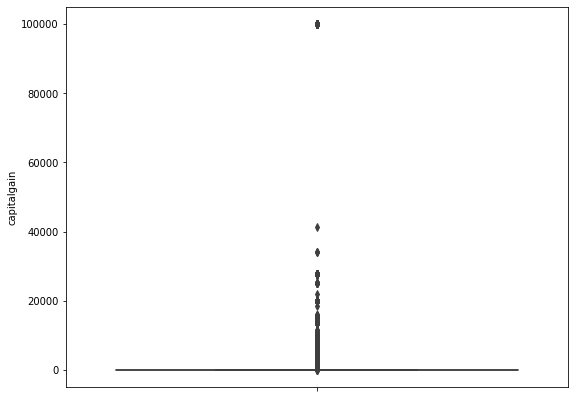

In [322]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='capitalgain')
plt.show()

In [323]:
df['capitalgain'].mean()

1213.0708844609553

In [324]:
df[df['capitalgain']>3000]

,age,gender,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ United-States,nativecountry_Other
47,38,1,15024,0,60,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
78,38,1,15024,0,80,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
79,50,1,7688,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
92,67,1,20051,0,48,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
123,43,1,5013,0,45,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31841,55,1,4386,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
31849,34,1,7298,0,35,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
31879,38,1,7298,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
31880,36,1,7298,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [325]:
df=df[df['capitalgain']<3000]

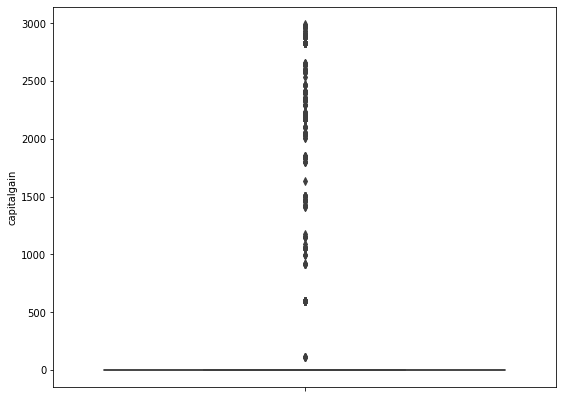

In [326]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='capitalgain')
plt.show()

In [327]:
df[df['capitalgain']>100]

,age,gender,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ United-States,nativecountry_Other
155,25,1,2174,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
170,26,1,1055,0,40,1,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
232,22,0,2597,0,40,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
289,35,1,2407,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
292,56,0,594,0,20,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31811,50,1,2407,0,98,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
31867,66,1,2050,0,55,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
31958,17,1,2176,0,18,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
31969,40,0,2174,0,40,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [328]:
df=df[df['capitalgain']<100]

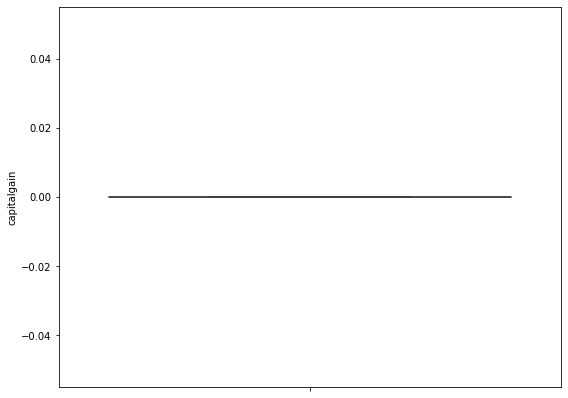

In [329]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='capitalgain')
plt.show()

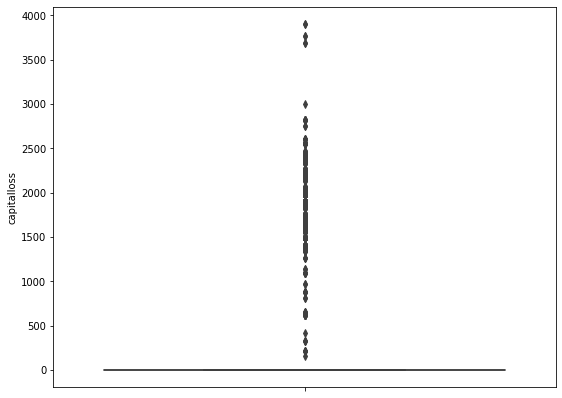

In [330]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='capitalloss')
plt.show()

In [331]:
df['capitalloss'].mean()

108.70507141378596

In [332]:
df[df['capitalloss']>200]

,age,gender,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ United-States,nativecountry_Other
26,49,1,0,1977,45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
68,49,1,0,1380,42,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
130,37,1,0,1977,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
145,52,1,0,1887,47,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
154,42,1,0,1902,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31925,44,0,0,2415,6,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
31941,28,1,0,2179,40,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
31942,41,1,0,1977,65,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
31963,36,1,0,1408,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [333]:
df=df[df['capitalloss']<200]

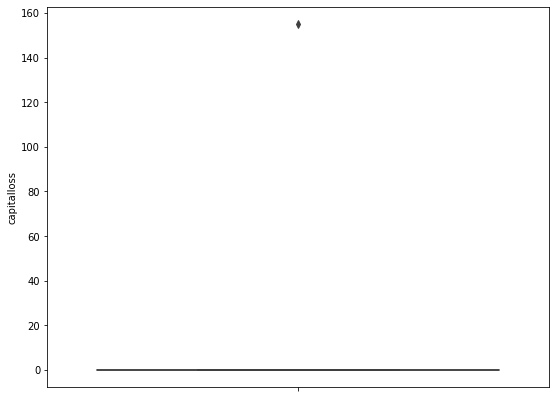

In [334]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='capitalloss')
plt.show()

In [335]:
df[df['capitalloss']>140]

,age,gender,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ United-States,nativecountry_Other
19472,28,0,0,155,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [336]:
df=df[df['capitalloss']<140]

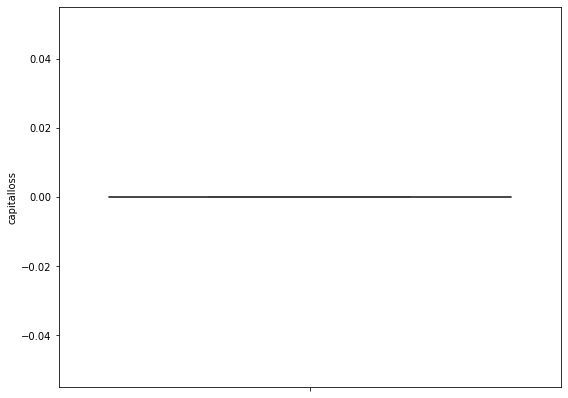

In [337]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='capitalloss')
plt.show()

In [338]:
df.shape

(22747, 53)

In [339]:
df.head()

,age,gender,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ United-States,nativecountry_Other
0,45,0,0,0,28,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,44,1,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,27,1,0,0,40,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,20,1,0,0,35,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
5,44,0,0,0,40,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [340]:
cols_to_scale=['age','hoursperweek','capitalgain','capitalloss']

In [341]:
scaler=MinMaxScaler()

In [342]:
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [343]:
df.head()

,age,gender,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ United-States,nativecountry_Other
0,0.482759,0,0.0,0.0,0.275510,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.465517,1,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.172414,1,0.0,0.0,0.397959,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.051724,1,0.0,0.0,0.346939,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
5,0.465517,0,0.0,0.0,0.397959,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [344]:
df['SalStat'].value_counts()

1    18204
0     4543
Name: SalStat, dtype: int64

In [345]:
X=df.drop('SalStat',axis=1)
y=df['SalStat']

In [346]:
X

,age,gender,capitalgain,capitalloss,hoursperweek,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ United-States,nativecountry_Other
0,0.482759,0,0.0,0.0,0.275510,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.465517,1,0.0,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.172414,1,0.0,0.0,0.397959,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.051724,1,0.0,0.0,0.346939,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,0.465517,0,0.0,0.0,0.397959,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31970,0.224138,0,0.0,0.0,0.244898,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
31972,0.275862,1,0.0,0.0,0.500000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
31974,0.293103,0,0.0,0.0,0.397959,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
31975,0.103448,1,0.0,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [347]:
y

0        1
2        0
3        1
4        1
5        1
        ..
31970    0
31972    0
31974    1
31975    1
31976    1
Name: SalStat, Length: 22747, dtype: int32

In [348]:
smote=SMOTE(sampling_strategy='minority')

In [349]:
X_sm,y_sm=smote.fit_resample(X,y)

In [350]:
X_sm.shape

(36408, 52)

In [351]:
y_sm.shape

(36408,)

In [352]:
y_sm.value_counts()

1    18204
0    18204
Name: SalStat, dtype: int64

In [353]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=101,stratify=y_sm)

In [354]:
X_train.shape

(29126, 52)

In [355]:
X_test.shape

(7282, 52)

In [356]:
y_train.shape

(29126,)

In [357]:
y_train.value_counts()

0    14563
1    14563
Name: SalStat, dtype: int64

In [358]:
y_test.shape

(7282,)

In [359]:
y_test.value_counts()

0    3641
1    3641
Name: SalStat, dtype: int64

In [360]:
model=Sequential([
    layers.Dense(52,activation='relu',input_shape=(52,)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(2000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

model.fit(X_train,y_train,epochs=40)

Epoch 1/40
911/911 [==============================] - 159s 170ms/step - loss: 0.4181 - accuracy: 0.8120
Epoch 2/40
911/911 [==============================] - 154s 169ms/step - loss: 0.3875 - accuracy: 0.8280
Epoch 3/40
911/911 [==============================] - 144s 158ms/step - loss: 0.3771 - accuracy: 0.8356
Epoch 4/40
911/911 [==============================] - 149s 164ms/step - loss: 0.3652 - accuracy: 0.8396
Epoch 5/40
911/911 [==============================] - 156s 172ms/step - loss: 0.3567 - accuracy: 0.8434
Epoch 6/40
911/911 [==============================] - 140s 153ms/step - loss: 0.3486 - accuracy: 0.8482
Epoch 7/40
911/911 [==============================] - 140s 153ms/step - loss: 0.3411 - accuracy: 0.8508
Epoch 8/40
911/911 [==============================] - 143s 157ms/step - loss: 0.3330 - accuracy: 0.8551
Epoch 9/40
911/911 [==============================] - 142s 156ms/step - loss: 0.3266 - accuracy: 0.8588
Epoch 10/40
911/911 [==============================] - 140s 154m

In [361]:
model.evaluate(X_test,y_test)

228/228 [==============================] - 5s 21ms/step - loss: 0.5719 - accuracy: 0.8591


[0.5718614459037781, 0.8591046333312988]

In [362]:
y_pred=model.predict(X_test)
y_pred[:5]

228/228 [==============================] - 5s 21ms/step


array([[0.17192009],
       [0.11156066],
       [1.        ],
       [0.36120212],
       [0.9617086 ]], dtype=float32)

In [363]:
y_predict=[]

for i in y_pred:
    if i<0.5:
        y_predict.append(0)
    else:
        y_predict.append(1)

In [364]:
y_predict[:5]

[0, 0, 1, 0, 1]

In [365]:
y_test[:5]

31575    0
15161    1
7004     1
23356    0
9936     1
Name: SalStat, dtype: int32

In [366]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      4085
           1       0.80      0.91      0.85      3197

    accuracy                           0.86      7282
   macro avg       0.86      0.86      0.86      7282
weighted avg       0.87      0.86      0.86      7282



In [367]:
confusion_matrix(y_predict,y_test)

array([[3350,  735],
       [ 291, 2906]], dtype=int64)

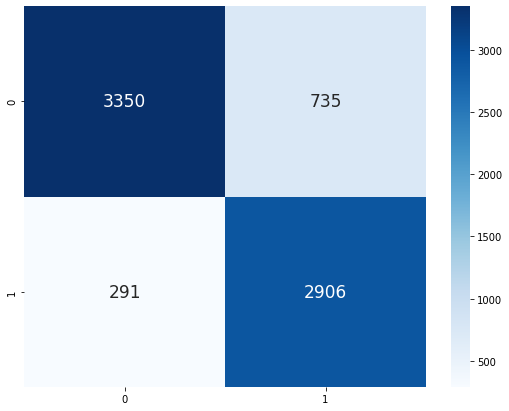

In [368]:
conf_mat=confusion_matrix(y_predict,y_test)
plt.figure(figsize=(9,7))
sns.heatmap(conf_mat,annot=True,annot_kws={'size':17},fmt='d',cmap='Blues')
plt.show()